Version control table:

| | Date #  | Version    | Change   | 
|---:|:-------------|:-----------|:------|
| 1 | 18 Nov | Draft Hand-in       |    | 
| 2 | 30 Nov  | Final first submission    |    | 
| 3 | 13 Dec  | Second submission    | - Add accuracy comparision between outlier-treated training data with untreated one
| |   |                                      | - Model selection chapter|
| |   |                                      | - Add conclusion and deployment chapter| 
| |   |                                      | - Explaination for each chapter| 

### Table of Contents

- 1. Introduction

- 2. Data collection
    * 2.1 Import packages
    * 2.2 Import and treat data  
    * 2.3 Finalize Delhi air quality and Cities air quality datasets 

- 3. Exploratory Data Analysis
    * 3.1 Handle missing value
    * 3.2 Visualization
	* 3.2.1 Delhi AQI
	* 3.2.2 Delhi meteorological factors
	* 3.2.3 Delhi polutant substance
	* 3.2.3 Cities's air quality
	* 3.2.3 Delhi AQI
	* 3.2.3 Delhi AQI	
    * 3.3 Correlation
        
- 4. Modelling Preparation
    * 4.1 Treat outliers
    * 4.2 Feature selection  
    * 4.3 Finalize train-test data
    * 4.4 Normalization
    * 4.5 Model selection

        
- 5. Modelling
    * 5.1 Regression:
        * 5.1.1 Linear regression model
        * 5.1.2 Polynomial regression model
	* 5.1.3 Support vector regression model
	* 5.1.4 Decission tree regression model
	* 5.1.5 K-Nearest Neighbour regression model:
    * 5.2 Regression validation:
	* 5.2.1 Plotting comparision of actual and predicted values different regression machine learning models
        * 5.2.2 R2 Cross validation
    * 5.2.3 Comparison on data with outlier treated:
	* 5.2.4 Hyperparameter Tuning

    * 5.3 Time series:
	* 5.3.1 Train test preparation
        * 5.3.2 Check stationarity and transforming
	* 5.3.3 Prophet model
	* 5.3.4 VAR model
    * 5.4 Time series validation

- 6. Deployment 

# 1. Introduction

According to a study by the World Health Organization (WHO), air pollution is responsible for 7 million deaths each year globally. India in recent years has often appeared on foreign and domestic newspapers about air pollution exceeding alarming levels. We can even see the level of air pollution in some of India’s cities with the naked eye, especially the captital of India, the city Delhi. As the capital of a second populated country in the world, Delhi attracts not only people from across India but also people from around the world. Along with dense population are traffic density, construction sites and heavy factories constantly springing up, making Delhi and other Indian cities's air pollution very heavy.

It is necessary to monitor the quality of air to protect people from respiratory disease. The goal of this challenge is to analyze the problem and predict the air quality from the data collected which includes pollutant substances indexes like SO2, CO2, etc and metrological factors like temperature, pressure, and relative humidity.

# 2. Data Collection
## 2.1 Import package



In [482]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import glob
import folium
import statsmodels.api as sm
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LinearRegression as lr
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score as cvs
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.ensemble import RandomForestRegressor

##  2.2 Import data

There are 3 set of datasets being used for this notebook. 
1. **Air quality dataset (1)** includes daily information about air quality substance as well as the AQI (Air Quality Index) and AQI_Bucket (Air Quality Index Bucket) for 26 cities of India from 2015 to 2020.


2. **Temperature dataset of Delhi (2)** includes temperature, humidity, wind speed and wind direction from 2015 to 2021 of Delhi city only.


3. **Temperature dataset of 6 other cities (3)** includes 6 different datasets of different cities in India in the first 14 days of October from 2018 to 2021. There are 6 cities with 6 different dataset. 


The idea is to merge Air quality dataset (1) and temperature dataset of Delhi (2) to get the **Delhi Air Quality** dataset that include pollutant substance variables and metrological factor variables of Delhi from 2015 to 2020. This dataset will later be treated as **Training dataset** for modelling.

The Temperature dataset of 6 other cities (3) will be mearged with Air quality dataset (1) to get a **Cities Air Quality** dataset that include pollutant substance variables and metrological factor variables of 6 different cities in India first 14 days of October from 2018 to 2021. This dataset will later be treated as **Testing dataset** for modelling.

### Import and treat Air Quality dataset (1) and Temperature dataset of Delhi (2)

In [483]:
air_quality = pd.read_csv(r'C:\Users\minhh\OneDrive\Desktop\ML\Challenge\Challenge 1\city_day.csv',sep=',')
weather = pd.read_csv(r'C:\Users\minhh\OneDrive\Desktop\ML\Challenge\Challenge 1\temperature_humidity_windspeed.csv', index_col=False)

Treat timestamp column:

In [484]:
air_quality['Date'] = [datetime.strptime(x, '%Y-%m-%d') for x in air_quality['Date']] #change date column from object to datetime column
weather=weather.drop(['Basel Temperature [1000 mb]','Basel Temperature [850 mb]'],axis=1)
weather['timestamp']=weather['timestamp'].str[:-5] #remove unnesessary part of text
weather=weather.groupby(['timestamp']).mean().reset_index() #take average number to get daily number
weather['timestamp'] = [datetime.strptime(x, '%Y%m%d') for x in weather['timestamp']] #change type of timestamp to datetime

weather.columns = ['Date', 'Temperature', 'Humidity', 'Wind Speed', 'Wind Direction']
weather.head(5)

Date  Temperature   Humidity  Wind Speed  Wind Direction
0 2014-09-01    15.010529  75.791667   10.254874      278.939712
1 2014-09-02    15.223446  70.041667    7.277148       89.777444
2 2014-09-03    15.855112  73.833333    8.105221      136.870941
3 2014-09-04    19.156363  75.208333    4.957090      113.672247
4 2014-09-05    21.025112  67.958333    3.991971      193.070215

### Import and treat Cities Air Quality dataset (3)
First, have a overall look at one of the weather set of dataset from Chennai:

In [485]:
Chennai_weather = pd.read_csv(r'C:\Users\minhh\OneDrive\Desktop\ML\Challenge\Challenge 1\weather_data\Chennai_weather.csv', header=None)
Chennai_weather

0            1                    2                  3  \
0          location      Chennai              Chennai            Chennai   
1               lat     13.06744             13.06744           13.06744   
2               lon     80.25395             80.25395           80.25395   
3               asl        8.800                8.800              8.800   
4          variable  Temperature  Precipitation Total  Relative Humidity   
...             ...          ...                  ...                ...   
1349  20181013T1900      28.8362                  0.0               79.0   
1350  20181013T2000      28.6162                  0.0               82.0   
1351  20181013T2100      28.3762                  0.0               85.0   
1352  20181013T2200      28.3962                  0.0               85.0   
1353  20181013T2300      28.2662                  0.0               85.0   

                            4           5          6  
0                     Chennai     Chennai    Chennai  
1                    13.06744    13.06744   13.06744  
2                    80.25395    80.25395   80.25395  
3                       8.800       8.800      8.800  
4     Mean Sea Level Pressure  Wind Speed  Wind Gust  
...                       ...         ...        ...  
1349                   1010.2   23.143827  23.039999  
1350                   1010.7   23.688984      24.48  
1351                   1011.1   24.627787      26.28  
1352                   1011.1   24.858253       27.0  
1353                   1011.0   25.006397      24.48  

[1354 rows x 7 columns]

#### Create a function to import 6 datasets from 6 cities and clean them
The next step is to import 6 dataset at a time, then treat it by using loop function. The example dataset above suggests that the cleaning steps should include:
- Get the city,longtitude,latitude from the rows and make it into one separate column
- Select 4th rows to be the header
- Remove unnessesary rows and unnessesary part of text in time column 
- Calculate average by date to get daily measurement
- Change data type

In [486]:
weather_file = glob.glob('C:/Users/minhh/OneDrive/Desktop/ML/Challenge/Challenge 1/weather_data' + "\*.csv")

#read csv files in a folder
for file in weather_file:
    df_nav=pd.read_csv(file,header = None)
    df_holding=pd.read_csv(file,header = None)
    
#append the files into different dataframe in order to treat it separately before merging it into one  
dfs = []
for file in weather_file:
    df = pd.read_csv(file,header = None)
    dfs.append(df)
    
#treat each of the dataframe  
for i in range(len(dfs)):
    loc_lon_lat = dfs[i].iloc[:3,0:2].set_index(0).transpose().reset_index().drop('index',axis=1) #slice first 3 rows to get the location and its long titude and latitude    
    dfs[i].columns = dfs[i].iloc[4] #select 4th rows to be the dataframe's header  
    dfs[i] = dfs[i].iloc[10:].reset_index().drop('index',axis=1) #remove unnecessary rows 
    dfs[i]['variable']=dfs[i]['variable'].str[:-5] #remove unnesessary part of text
    cols = dfs[i].columns.drop(['variable']) #change columns type
    dfs[i][cols] = dfs[i][cols].apply(pd.to_numeric, errors='coerce')
    dfs[i]=dfs[i].groupby(['variable']).mean().reset_index() #take average number to get daily number
    dfs[i]['variable'] = [datetime.strptime(x, '%Y%m%d') for x in dfs[i]['variable']] #change type of timestamp to datetime    
    dfs[i] = pd.concat([dfs[i], loc_lon_lat], axis=1).ffill(axis ='rows') #add location, longtitude and latitide column to the dataset
    dfs[i] = dfs[i].rename(columns={'variable': 'Date','location':'City', 'Precipitation Total':'Precipitation','Relative Humidity':'Humidity','Mean Sea Level Pressure':'Sea Level Pressure',}) #rename datetime column

# merge different dataframe of different cities together
weather_cities = pd.concat(dfs, ignore_index=True)
weather_cities.head(10)

Date  Temperature  Precipitation   Humidity  Sea Level Pressure  \
0 2018-09-30    33.096933            0.0  31.458333         1009.250000   
1 2018-10-01    33.267767            0.0  31.333333         1008.904167   
2 2018-10-02    33.601100            0.0  32.791667         1009.104167   
3 2018-10-03    33.276934            0.0  38.166667         1008.700000   
4 2018-10-04    33.169017            0.0  42.208333         1009.400000   
5 2018-10-05    33.772767            0.0  37.708333         1009.987500   
6 2018-10-06    33.962350            0.0  32.875000         1009.795833   
7 2018-10-07    33.781517            0.0  29.333333         1009.408333   
8 2018-10-08    33.524434            0.0  29.625000         1008.587500   
9 2018-10-09    33.409434            0.0  31.208333         1007.887500   

   Wind Speed  Wind Gust       City       lat       lon  
0    3.984344      7.050  Ahmedabad  23.04292  72.54681  
1    3.786475      7.575  Ahmedabad  23.04292  72.54681  
2    4.969224      6.375  Ahmedabad  23.04292  72.54681  
3    5.420413      8.835  Ahmedabad  23.04292  72.54681  
4    3.606704      6.765  Ahmedabad  23.04292  72.54681  
5    6.896575      9.870  Ahmedabad  23.04292  72.54681  
6    5.809883      7.860  Ahmedabad  23.04292  72.54681  
7    4.739560      7.455  Ahmedabad  23.04292  72.54681  
8    4.974646      9.450  Ahmedabad  23.04292  72.54681  
9    6.026198      9.450  Ahmedabad  23.04292  72.54681

## 2.3 Finalize Delhi air quality and Cities air quality datasets

#### Finalize Delhi air quality  datasets

Filter air_quality dataset by Delhi city and merge it with weather dataset:

In [487]:
Delhi_air_quality = air_quality[air_quality['City'] == 'Delhi'].drop(['City'],axis=1)
Delhi_air_quality.head(5)

Date   PM2.5    PM10     NO    NO2     NOx     NH3     CO   SO2  \
10229 2015-01-01  313.22  607.98  69.16  36.39  110.59   33.85  15.20  9.25   
10230 2015-01-02  186.18  269.55  62.09  32.87   88.14   31.83   9.54  6.65   
10231 2015-01-03   87.18  131.90  25.73  30.31   47.95   69.55  10.61  2.65   
10232 2015-01-04  151.84  241.84  25.01  36.91   48.62  130.36  11.54  4.63   
10233 2015-01-05  146.60  219.13  14.01  34.92   38.25  122.88   9.20  3.33   

          O3  Benzene  Toluene  Xylene    AQI AQI_Bucket  
10229  41.68    14.36    24.86    9.84  472.0     Severe  
10230  29.97    10.55    20.09    4.29  454.0     Severe  
10231  19.71     3.91    10.23    1.99  143.0   Moderate  
10232  25.36     4.26     9.71    3.34  319.0  Very Poor  
10233  23.20     2.80     6.21    2.96  325.0  Very Poor

In [488]:
Delhi_air_weather = weather.merge(Delhi_air_quality,how='inner',left_on='Date', right_on='Date')
Delhi_air_weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2008
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            2009 non-null   datetime64[ns]
 1   Temperature     2009 non-null   float64       
 2   Humidity        2009 non-null   float64       
 3   Wind Speed      2009 non-null   float64       
 4   Wind Direction  2009 non-null   float64       
 5   PM2.5           2007 non-null   float64       
 6   PM10            1932 non-null   float64       
 7   NO              2007 non-null   float64       
 8   NO2             2007 non-null   float64       
 9   NOx             2009 non-null   float64       
 10  NH3             2000 non-null   float64       
 11  CO              2009 non-null   float64       
 12  SO2             1899 non-null   float64       
 13  O3              1925 non-null   float64       
 14  Benzene         2009 non-null   float64       
 15  Tolu

In [489]:
Delhi_air_weather.head(5)

Date  Temperature   Humidity  Wind Speed  Wind Direction   PM2.5  \
0 2015-01-01     0.371362  79.416667    6.605597      191.054508  313.22   
1 2015-01-02     2.555945  78.041667    8.106652      186.098857  186.18   
2 2015-01-03     5.011779  89.541667   19.498835      208.326001   87.18   
3 2015-01-04     4.181779  80.541667   11.207847      282.424481  151.84   
4 2015-01-05     1.623862  83.333333    7.691152      104.005272  146.60   

     PM10     NO    NO2     NOx     NH3     CO   SO2     O3  Benzene  Toluene  \
0  607.98  69.16  36.39  110.59   33.85  15.20  9.25  41.68    14.36    24.86   
1  269.55  62.09  32.87   88.14   31.83   9.54  6.65  29.97    10.55    20.09   
2  131.90  25.73  30.31   47.95   69.55  10.61  2.65  19.71     3.91    10.23   
3  241.84  25.01  36.91   48.62  130.36  11.54  4.63  25.36     4.26     9.71   
4  219.13  14.01  34.92   38.25  122.88   9.20  3.33  23.20     2.80     6.21   

   Xylene    AQI AQI_Bucket  
0    9.84  472.0     Severe  
1    4.29  454.0     Severe  
2    1.99  143.0   Moderate  
3    3.34  319.0  Very Poor  
4    2.96  325.0  Very Poor

#### Final Cities air quality dataset

In [490]:
Cities_air_weather = pd.merge(weather_cities, air_quality, how="inner", on=["Date", "City"])
Cities_air_weather.head(5)

Date  Temperature  Precipitation   Humidity  Sea Level Pressure  \
0 2018-09-30    33.096933            0.0  31.458333         1009.250000   
1 2018-10-01    33.267767            0.0  31.333333         1008.904167   
2 2018-10-02    33.601100            0.0  32.791667         1009.104167   
3 2018-10-03    33.276934            0.0  38.166667         1008.700000   
4 2018-10-04    33.169017            0.0  42.208333         1009.400000   

   Wind Speed  Wind Gust       City       lat       lon  ...     NOx  NH3  \
0    3.984344      7.050  Ahmedabad  23.04292  72.54681  ...  111.66  NaN   
1    3.786475      7.575  Ahmedabad  23.04292  72.54681  ...  136.93  NaN   
2    4.969224      6.375  Ahmedabad  23.04292  72.54681  ...  106.35  NaN   
3    5.420413      8.835  Ahmedabad  23.04292  72.54681  ...   74.24  NaN   
4    3.606704      6.765  Ahmedabad  23.04292  72.54681  ...   46.66  NaN   

      CO     SO2     O3  Benzene  Toluene  Xylene    AQI  AQI_Bucket  
0  42.88   60.33  44.38     3.94    16.02    0.65  862.0      Severe  
1  59.21   74.04  45.36     3.94    16.02    0.65  951.0      Severe  
2  26.73   53.57  67.63     4.26    14.93    1.28  712.0      Severe  
3  15.84  128.38  66.85     4.41    12.36    3.30  483.0      Severe  
4  12.95   92.16  69.39     3.65    12.86    4.34  379.0   Very Poor  

[5 rows x 24 columns]

In [491]:
Cities_air_weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168 entries, 0 to 167
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                168 non-null    datetime64[ns]
 1   Temperature         168 non-null    float64       
 2   Precipitation       168 non-null    float64       
 3   Humidity            168 non-null    float64       
 4   Sea Level Pressure  168 non-null    float64       
 5   Wind Speed          168 non-null    float64       
 6   Wind Gust           168 non-null    float64       
 7   City                168 non-null    object        
 8   lat                 168 non-null    object        
 9   lon                 168 non-null    object        
 10  PM2.5               167 non-null    float64       
 11  PM10                112 non-null    float64       
 12  NO                  167 non-null    float64       
 13  NO2                 167 non-null    float64       

# 3. EDA

## 3.1 Handle missing value
#### First, handle missing value in Delhi air quality dataset
Create a function to check for null value and how much is it in the dataset:

In [492]:
def missing_data(dataset):
    total_null = dataset.isnull().sum().sort_values(ascending=False)
    total = dataset.isnull().count()
    percent = total_null/total*100
    missing = pd.concat([total_null, percent], axis=1, keys=['Total', '%'])
    display(missing)
    
missing_data(Delhi_air_weather)

Total          %
Xylene            781  38.875062
SO2               110   5.475361
O3                 84   4.181185
PM10               77   3.832753
AQI_Bucket         10   0.497760
AQI                10   0.497760
NH3                 9   0.447984
PM2.5               2   0.099552
NO                  2   0.099552
NO2                 2   0.099552
Toluene             0   0.000000
Benzene             0   0.000000
Date                0   0.000000
CO                  0   0.000000
Temperature         0   0.000000
Wind Direction      0   0.000000
Wind Speed          0   0.000000
Humidity            0   0.000000
NOx                 0   0.000000

There are different ways to treat null values, such as replacing them with average, mode or just remove it. However, as seen in the table above, the percentage of null values as compared to the whole dataset is not high. Also, because of the characteristic of the weather and pollutant dataset, that is the weather and pollutant measurement can be indifferent in the same period of time. Therefore, the null value can be treated by replace it with yesterday or following date's value:

In [493]:
#replace null with previous value
for i in Delhi_air_weather.columns:
    Delhi_air_weather[i] = Delhi_air_weather[i].ffill(axis ='rows')
    
#Check for null again
Delhi_air_weather.isnull().sum()

Date              0
Temperature       0
Humidity          0
Wind Speed        0
Wind Direction    0
PM2.5             0
PM10              0
NO                0
NO2               0
NOx               0
NH3               0
CO                0
SO2               0
O3                0
Benzene           0
Toluene           0
Xylene            0
AQI               0
AQI_Bucket        0
dtype: int64

#### Next, handle missing value in Cities air quality dataset

In [494]:
missing_data(Cities_air_weather)

Total          %
NH3                    70  41.666667
Xylene                 69  41.071429
PM10                   56  33.333333
Toluene                41  24.404762
Benzene                13   7.738095
O3                     11   6.547619
AQI_Bucket              3   1.785714
AQI                     3   1.785714
SO2                     2   1.190476
NO2                     1   0.595238
CO                      1   0.595238
NOx                     1   0.595238
NO                      1   0.595238
PM2.5                   1   0.595238
Temperature             0   0.000000
lon                     0   0.000000
lat                     0   0.000000
City                    0   0.000000
Wind Gust               0   0.000000
Wind Speed              0   0.000000
Sea Level Pressure      0   0.000000
Humidity                0   0.000000
Precipitation           0   0.000000
Date                    0   0.000000

Now, lets see the number of null for each city:

In [495]:
Cities_air_weather.isnull().groupby(Cities_air_weather['City']).sum()

Date  Temperature  Precipitation  Humidity  Sea Level Pressure  \
City                                                                        
Ahmedabad     0            0              0         0                   0   
Chennai       0            0              0         0                   0   
Delhi         0            0              0         0                   0   
Hyderabad     0            0              0         0                   0   
Mumbai        0            0              0         0                   0   
Patna         0            0              0         0                   0   

           Wind Speed  Wind Gust  City  lat  lon  ...  NOx  NH3  CO  SO2  O3  \
City                                              ...                          
Ahmedabad           0          0     0    0    0  ...    0   28   0    1   0   
Chennai             0          0     0    0    0  ...    0    0   0    0   0   
Delhi               0          0     0    0    0  ...    0    0   0    0   0   
Hyderabad           0          0     0    0    0  ...    0    0   0    0   0   
Mumbai              0          0     0    0    0  ...    0   14   0    0   0   
Patna               0          0     0    0    0  ...    1   28   1    1  11   

           Benzene  Toluene  Xylene  AQI  AQI_Bucket  
City                                                  
Ahmedabad        0        0       0    0           0  
Chennai          0        0      28    0           0  
Delhi            0        0       0    0           0  
Hyderabad        0        0       0    0           0  
Mumbai           0       28      28    0           0  
Patna           13       13      13    3           3  

[6 rows x 24 columns]

As seen on the table above, Patna is the cities that has the most null value for multiple air substances variable. So, we can drop the city Patna and replace other null values of other cities by nearest date value:

In [496]:
#replace null with previous value
for i in Cities_air_weather.columns:
    Cities_air_weather[i] = Cities_air_weather[i].ffill(axis ='rows').bfill(axis ='rows')
    
#Check for null again
Cities_air_weather.isnull().sum()

Date                  0
Temperature           0
Precipitation         0
Humidity              0
Sea Level Pressure    0
Wind Speed            0
Wind Gust             0
City                  0
lat                   0
lon                   0
PM2.5                 0
PM10                  0
NO                    0
NO2                   0
NOx                   0
NH3                   0
CO                    0
SO2                   0
O3                    0
Benzene               0
Toluene               0
Xylene                0
AQI                   0
AQI_Bucket            0
dtype: int64

## 3.2 Visualization

Add other time measure such as Year, Month and Season to the dataset for visualization:

In [497]:
Delhi_air_weather['Year'] = Delhi_air_weather.Date.dt.year
Delhi_air_weather['Month'] = Delhi_air_weather.Date.dt.month_name()
Delhi_air_weather['MonthNr'] = Delhi_air_weather.Date.dt.month
#Delhi_air_weather['Month'] = Delhi_air_weather.Date.dt.month_name().str.slice(stop=3)
#Delhi_air_weather['Day'] = Delhi_air_weather.Date.dt.day
conditions = [
    (Delhi_air_weather['MonthNr'] >=1) & (Delhi_air_weather['MonthNr'] < 4),
    (Delhi_air_weather['MonthNr'] >=4) & (Delhi_air_weather['MonthNr'] < 7),
    (Delhi_air_weather['MonthNr'] >=7) & (Delhi_air_weather['MonthNr'] < 10),
    (Delhi_air_weather['MonthNr'] >=10) & (Delhi_air_weather['MonthNr'] <= 12)]
choices = ['1', '2', '3', '4']
Delhi_air_weather['Season'] = np.select(conditions, choices)

### 3.2.1 Delhi AQI
#### Delhi AQI through the years

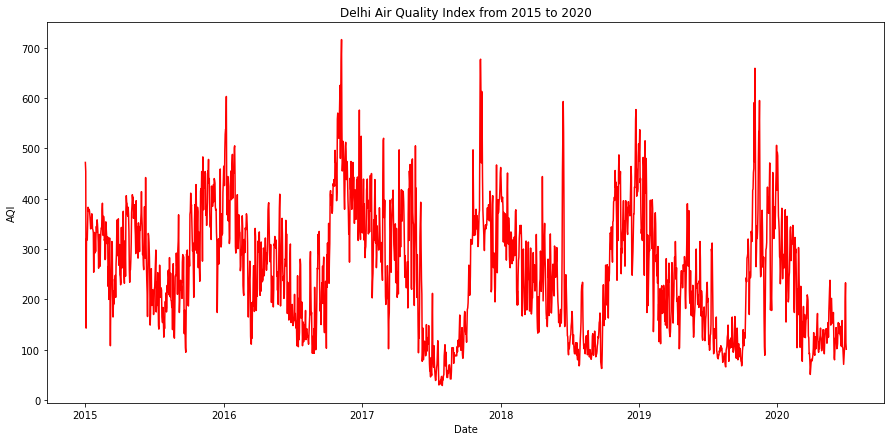

In [498]:
plt.figure(figsize=(15,7))
sns.lineplot(data=Delhi_air_weather, x="Date", y="AQI", color = 'r')
plt.title('Delhi Air Quality Index from 2015 to 2020')
plt.show()

**Findings:** The red line show the value of AQI, as shown on the above graph, the Air Quality Index in Delhi is really high. It means this city is in highly polluted situation. The graph also show seasonal trend, in which the AQI tend to be low in the summer and fall, and high at the end of the year.

Text(0.5, 1.0, 'Boxplot of Delhi AQI through the year')

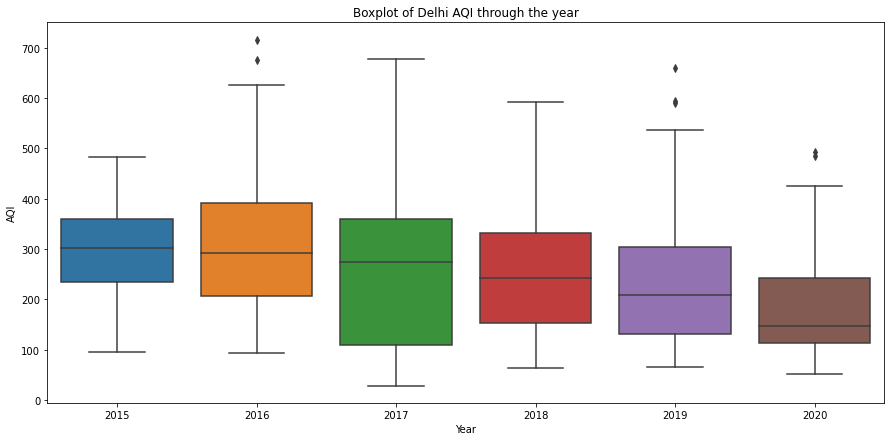

In [499]:
plt.figure(figsize=(15,7))
sns.boxplot(x="Year", y="AQI", data=Delhi_air_weather).set_title('Boxplot of Delhi AQI through the year')

**Findings:** The box plot show that Delhi average AQI are around 250-280, which is considered Poor in the quality and does affect human health according to WHO. Most of the time Delhi AQI are higher than 200, except for the year 2020, which show some positive results from the effort to improve air quality in India.

#### Delhi average AQI through the months

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


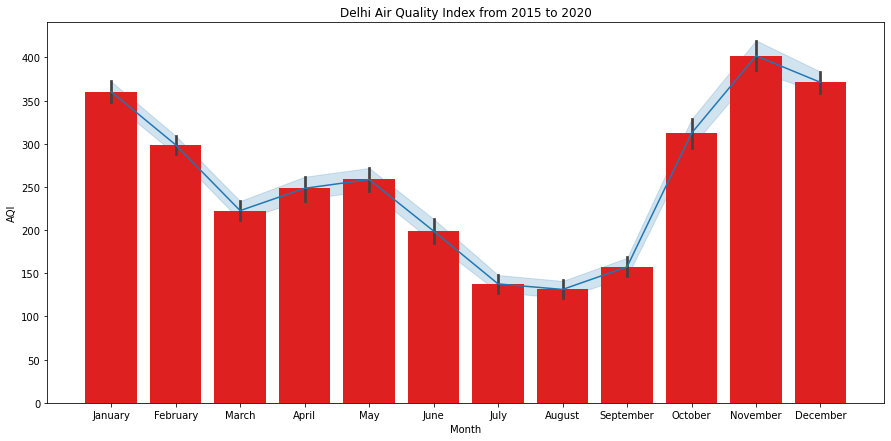

In [500]:
plt.figure(figsize=(15,7))
sns.barplot(x='Month',y='AQI', data=Delhi_air_weather, color ='r')
sns.lineplot(x='Month',y='AQI', data=Delhi_air_weather)
plt.title('Delhi Air Quality Index from 2015 to 2020')
plt.show()

**Findings:** A closer look into AQI distribution across the year can confirm that AQI decreased in July, August and September and increase strongly in the next month.

#### Delhi AQI bucket through the years

There are 365 days a year, each day has its own AQI measured, and it is good to know how is the air quality of Delhi performance for each year and throughout the year:

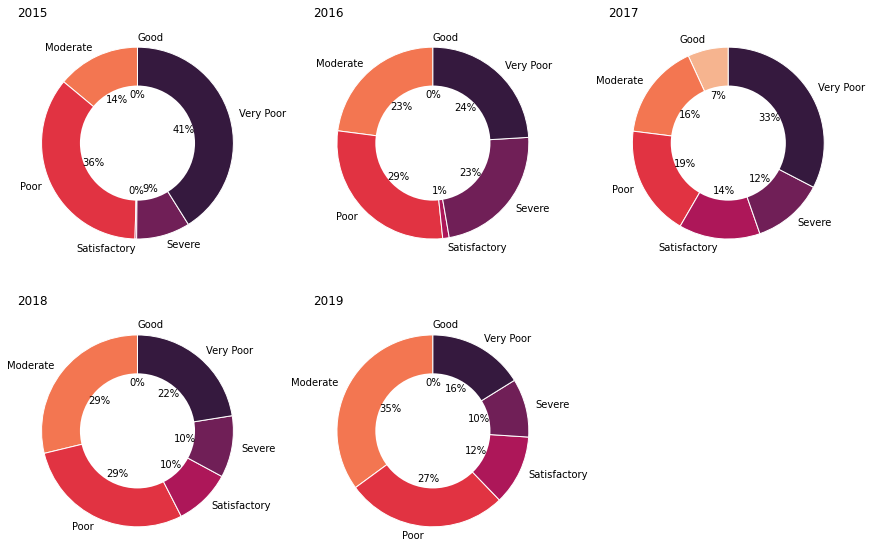

In [501]:
Delhi_Bucket = Delhi_air_weather[['AQI_Bucket','Year','Date']].groupby(['Year','AQI_Bucket']).count().reset_index()
#Delhi_Bucket = Delhi_Bucket.loc[Delhi_Bucket['Year'] != 2020].pivot(index=['Year'],columns='AQI_Bucket', values='Date').replace(np.nan,0)
Delhi_Bucket = Delhi_Bucket.loc[Delhi_Bucket['Year'] != 2020].pivot(index=['AQI_Bucket'],columns='Year', values='Date').replace(np.nan,0)
#Delhi_Bucket.columns = ['Good', 'Satisfactory', 'Moderate', 'Poor', 'Very poor', 'Severe']
Delhi_Bucket = Delhi_Bucket.reset_index(drop=False)

pie, ax = plt.subplots(figsize=[15,15])
labels = Delhi_Bucket['AQI_Bucket']
pal = sns.color_palette(palette='rocket_r', n_colors=6, desat=None)
num=0
for i in Delhi_Bucket.drop('AQI_Bucket',axis=1).columns:
    num+=1
    plt.subplot(3,3, num)
    plt.pie(x=Delhi_Bucket[i], autopct="%1.f%%", startangle=90, pctdistance=0.5, labels = labels, wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' }, colors=pal)
    centre_circle = plt.Circle((0,0),0.60,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    # Not ticks everywhere
    if num in range(7) :
        plt.tick_params(labelbottom='off')
    if num not in [1,4,7] :
        plt.tick_params(labelleft='off')
    # Add title
    plt.title(i, loc='left', fontsize=12, fontweight=0 )

**Findings:** The graph show the number of days for each level of pollution. In 2015, half of the year (around 180 days) that the air quality is very poor and severe. The number of highly polluted days does decreased throughout the years, however, there are rare days with good air quality. 

### 3.2.2 Delhi meteorological factors and AQI

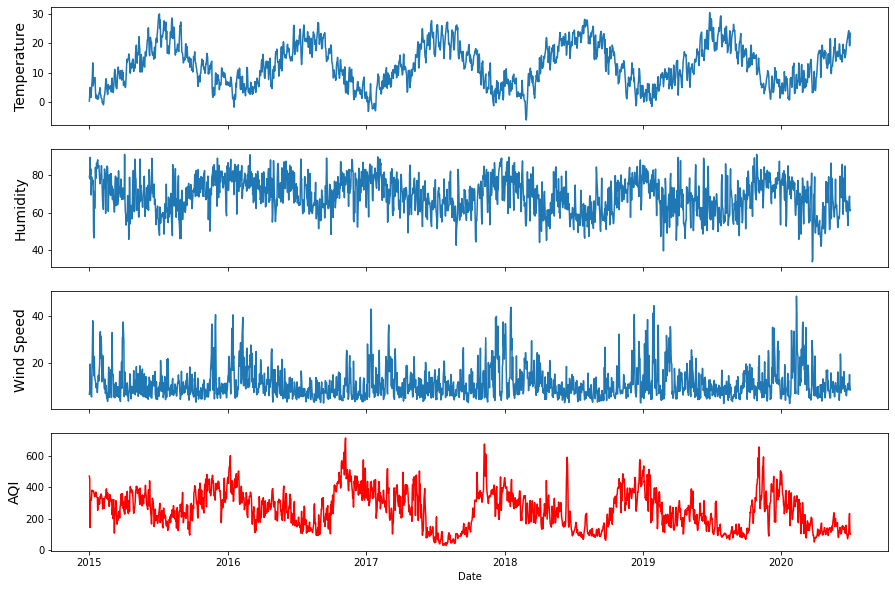

In [502]:
f, ax = plt.subplots(nrows=4, ncols=1,sharex=True, figsize=(15, 10))
for i, column in enumerate(Delhi_air_weather[['Temperature','Humidity', 'Wind Speed', 'AQI']].columns):
    #plt.title('Delhi Temperature through the years from 2015 to 2020')
    if column == 'AQI':
        sns.lineplot(x=Delhi_air_weather['Date'], y=Delhi_air_weather[column], ax=ax[i], color='red')
    else:
        sns.lineplot( x=Delhi_air_weather['Date'], y=Delhi_air_weather[column], ax=ax[i])
    ax[i].set_ylabel(ylabel=column, fontsize=14)  


**Findings:** The graph above show the Delhi meteorological factors throughout the years as compared to AQI. First, have a look at meteorological factors, we can clearly see the seasonal trend in Temperature, in which it is high in summer and low in Winter. Humidity and Wind Speed factors also shows some seasonal trend, but not as clearly as Temperature. We can also spotted from the graph that Temperature and AQI have somewhat opposite trend, when Temperature is high, AQI tend to be low. Let’s discover that in below graphs.

#### Delhi meteorological factors relationship with AQI throughout the months

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


Text(0.5, 1.0, 'Delhi Temperature and AQI')

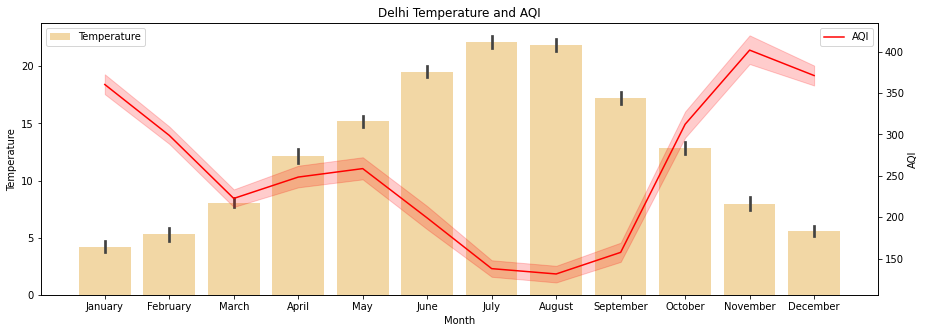

In [503]:
fig, ax1 = plt.subplots(figsize=(15,5))
ax2=ax1.twinx()
sns.barplot(x='Month',y='Temperature', data=Delhi_air_weather,ax=ax1, label='Temperature', color='orange', alpha = 0.4)
ax1.legend(loc='upper left')
sns.lineplot(x='Month',y='AQI', data=Delhi_air_weather, ax=ax2, legend = None , label='AQI', color='r')
ax2.legend(loc='upper right')
plt.title('Delhi Temperature and AQI')

**Findings:** As expected in the above chart, the temperature trend is opposite with humidity and AQI. It can be partly figured from the above Temperature versus AQI chart that in summer, when the temperature hits the highest point, the AQI is relatively low. The temperature is high in summer, and this is when the AQI reach its lowest. It can be said that Temperature and AQI has negative correlation.

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


Text(0.5, 1.0, 'Delhi Humidity and AQI')

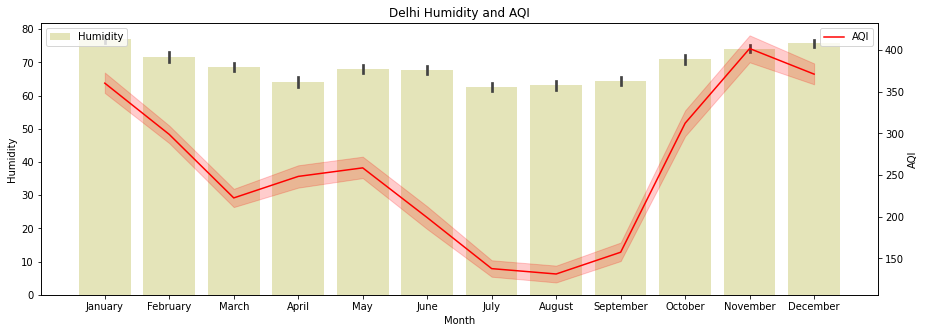

In [504]:
fig, ax1 = plt.subplots(figsize=(15,5))
ax2=ax1.twinx()
sns.barplot(x='Month',y='Humidity', data=Delhi_air_weather,ax=ax1, label='Humidity', color='y', alpha=0.3)
ax1.legend(loc='upper left')
sns.lineplot(x='Month',y='AQI', data=Delhi_air_weather, ax=ax2, legend = None , label='AQI', color='r')
ax2.legend(loc='upper right')
plt.title('Delhi Humidity and AQI')

**Findings:** Contrary to Temperature, Humidity is slightly low in the summer as compared to spring and winter. Besides, there is no particular trend spotted, however, we can see that Humidity and AQI have pretty same pattern. Different from Temperature, Humidity, in the other hand, does not have strong correlation with AQI. However, they have a slightly similar trend throughout the year.

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


Text(0.5, 1.0, 'Delhi Wind speed and AQI')

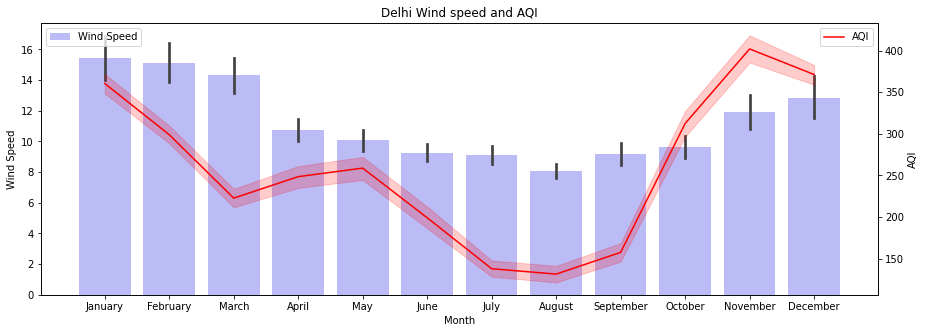

In [505]:
fig, ax1 = plt.subplots(figsize=(15,5))
ax2=ax1.twinx()
sns.barplot(x='Month',y='Wind Speed', data=Delhi_air_weather,ax=ax1, label='Wind Speed', color='b', alpha=0.3)
ax1.legend(loc='upper left')
sns.lineplot(x='Month',y='AQI', data=Delhi_air_weather, ax=ax2, legend = None , label='AQI', color='r')
ax2.legend(loc='upper right')
plt.title('Delhi Wind speed and AQI')

**Findings:** First, look at the left y-axis for wind speed only, we can see that the wind speed is all time low through the years. It seems that Delhi is not a windy city, the highest wind speed of the year seems to be in winter and spring. Similar with the humidity factor, wind speed and AQI show pretty much same trend with each other. The stronger the wind, the lower the AQI. Also, as seen in the left x-axis, the wind speed is pretty low in Delhi. 

### 3.2.3  Delhi polutant substance and AQI

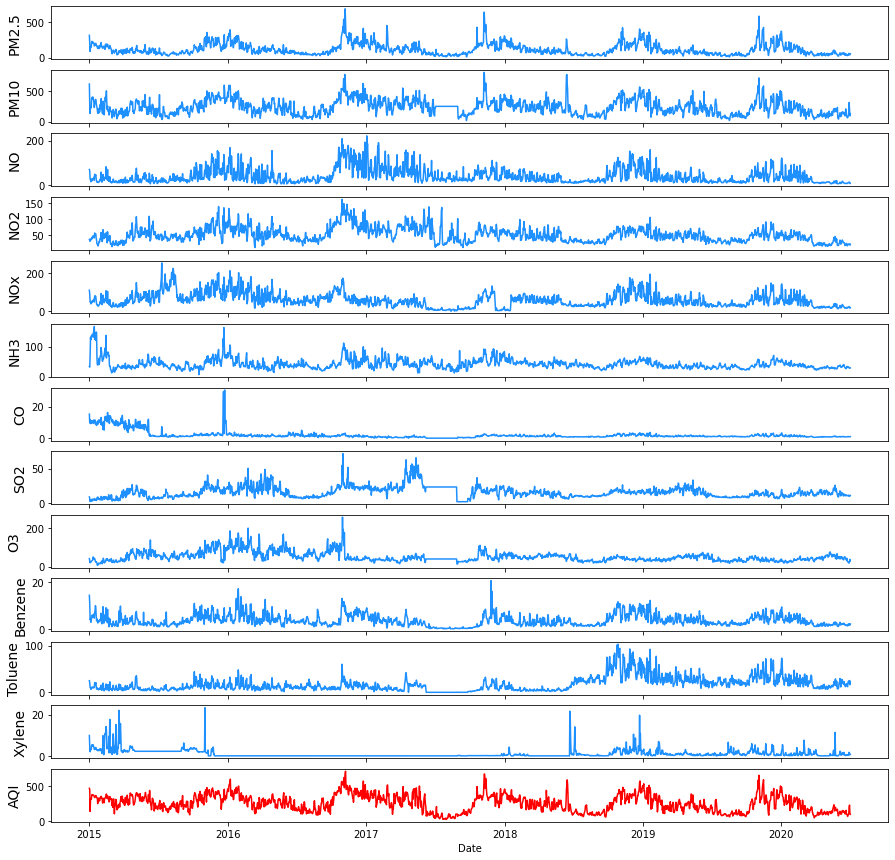

In [506]:
f, ax = plt.subplots(nrows=13, ncols=1,sharex=True, figsize=(15, 15))

#for i, column in enumerate(air_weather_plot[['Temperature','Humidity', 'Wind Speed','Wind Direction', 'AQI']]):
for i, column in enumerate(Delhi_air_weather.drop(['Date', 'Temperature','Humidity', 'Wind Speed', 'Wind Direction', 'Year','MonthNr', 'Season', 'AQI_Bucket', 'Month'], axis=1).columns):
    if column == 'AQI':
        sns.lineplot(x=Delhi_air_weather['Date'], y=Delhi_air_weather[column], ax=ax[i], color='red')
    else:
        sns.lineplot(x=Delhi_air_weather['Date'], y=Delhi_air_weather[column], ax=ax[i], color='dodgerblue')
    #ax[i].set_title('Feature: {}'.format(column), fontsize=14, loc='right')
    ax[i].set_ylabel(ylabel=column, fontsize=14)  

**Findings:** The graph above show the distribution of the pollutant substances throughout the year. We can see from this graph that there are no clear trend or seasonal pattern in the distribution of some pollutants such as CO, O3, Xylene,etc  in a year or throughout the year. Other pollutants, such as PM, NO2 and also NH3 closely follow AQI trend that it tends to be low in the middle of the year. 

To confirm the findings above, let’s look at the monthly graph for each pollutants below:


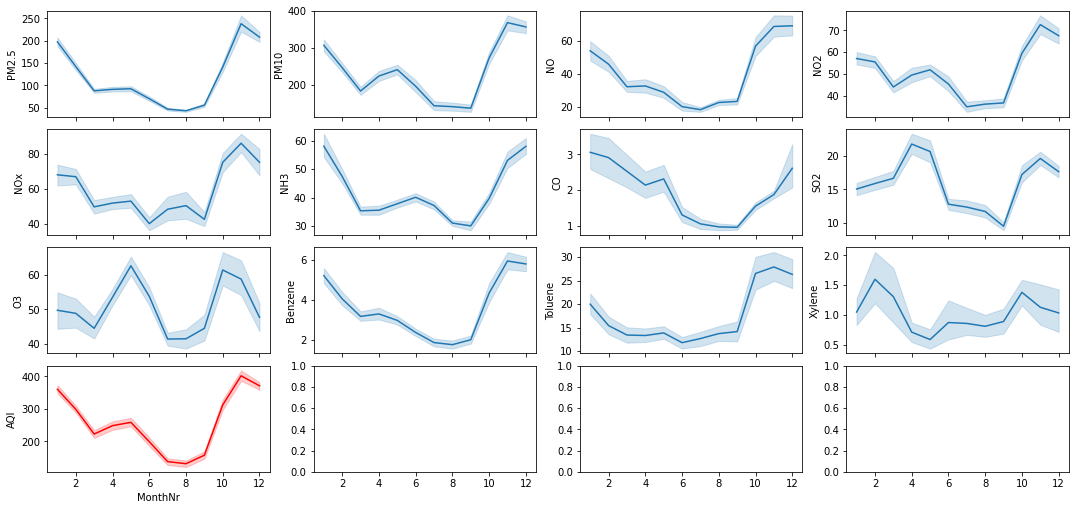

In [507]:
#Plotting boxplots to see if there are any outliers in our data (considering data betwen 25th and 75th percentile as non outlier)
fig, ax = plt.subplots(ncols=4, nrows=4, figsize=(15, 7), sharex=True)
ax = ax.flatten()
index = 0
for i in Delhi_air_weather.drop(['Date', 'Temperature','Humidity', 'Wind Speed', 'Wind Direction', 'Year','MonthNr', 'Season', 'AQI_Bucket', 'Month'], axis=1).columns:
    if i == 'AQI':
        sns.lineplot(x='MonthNr', y=i, data=Delhi_air_weather, ax=ax[index], color='r')
    else:
        sns.lineplot(x='MonthNr', y=i, data=Delhi_air_weather, ax=ax[index])
    index+=1
plt.tight_layout(pad=0.4)
plt.show()

**Findings:** Not every pollutants follow the exact same trend as AQI, however, it’s still have overall similar trend that it’s tend to be lower in late summer. PM2.5, PM10 and NH3 noticeably has a closely exact line as AQI. We can say that these 3 substances has high relation to AQI. In other words, AQI is affected hugely by these substance.

### 3.2.3 Other cities's air quality
#### Cities air quality map

In [508]:
loc_Cities = Cities_air_weather.drop(['Date','AQI_Bucket'],axis=1).groupby(['City','lon','lat']).mean().reset_index()

m = folium.Map(location=[20,0], tiles="OpenStreetMap", zoom_start=2)

for i in range(0,len(loc_Cities)):
   folium.Circle(
      location=[loc_Cities.iloc[i]['lat'], loc_Cities.iloc[i]['lon']],
      popup=loc_Cities.iloc[i]['City'],
      radius=float(loc_Cities.iloc[i]['AQI'])*2000,
      color='crimson',
      fill=True,
      fill_color='crimson'
   ).add_to(m)

m

**Findings:** This graph plot the 3-years-average AQI recorded only first 2 weeks of October. As we notice from the first glance, there is a big circle, which represent Ahmedabad, overlap other circles of other city. This city must have much higher AQI than other cities, following is Delhi and Patna. Let’s plot this in a line graph to see the difference regarding the amount of AQI:

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


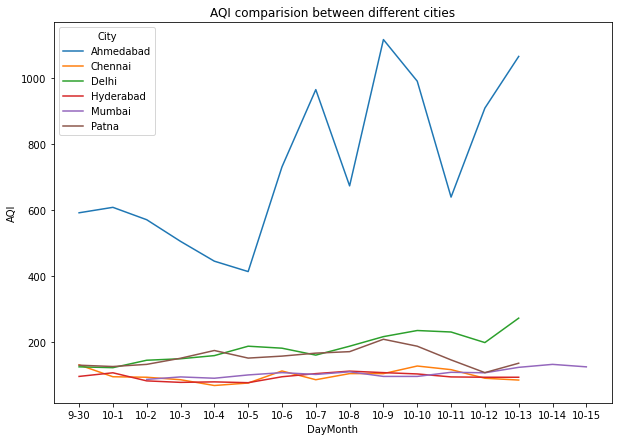

In [509]:
Cities_air_weather['Year'] = Cities_air_weather.Date.dt.year
Cities_air_weather['MonthNr'] = Cities_air_weather.Date.dt.month
Cities_air_weather['Day'] = Cities_air_weather.Date.dt.day
Cities_air_weather['DayMonth'] = Cities_air_weather[['MonthNr','Day']].astype(str).agg('-'.join, axis=1)
#Cities_air_weather['DayMonth'] = [datetime.strptime(x, '%m-%d') for x in Cities_air_weather['DayMonth']]
#Cities_air_weather.sort_values(by=['Date'])
conditions = [
    (Cities_air_weather['MonthNr']>=1) & (Cities_air_weather['MonthNr'] < 4),
    (Cities_air_weather['MonthNr'] >=4) & (Cities_air_weather['MonthNr'] < 7),
    (Cities_air_weather['MonthNr'] >=7) & (Cities_air_weather['MonthNr'] < 10),
    (Cities_air_weather['MonthNr'] >=10) & (Cities_air_weather['MonthNr'] <= 12)]
choices = ['1', '2', '3', '4']
Cities_air_weather['Season'] = np.select(conditions, choices)
Cities_air_weather['Day'] = Cities_air_weather.Date.dt.day

dm_cities = Cities_air_weather.groupby(['City','Day', 'MonthNr','DayMonth']).mean().sort_values(by=['City','MonthNr', 'Day']).reset_index()

plt.figure(figsize=(10,7))
sns.lineplot(data=dm_cities, x="DayMonth", y="AQI", hue="City", legend=True, palette='tab10')
plt.title('AQI comparision between different cities')
plt.show()

**Findings:** The line graph has spotted that Ahmedabad air quality is almost 6 times higher than other cities that being investigated. As this is the dataset for Testing purpose. The abnormal in Ahmedabad should be taken into account.

# 4. Modelling preparation

## 4.1 Check Outliers

Check for outliers and try to replace outliers. Later on, we can evaluate the model with and without outliers treatment

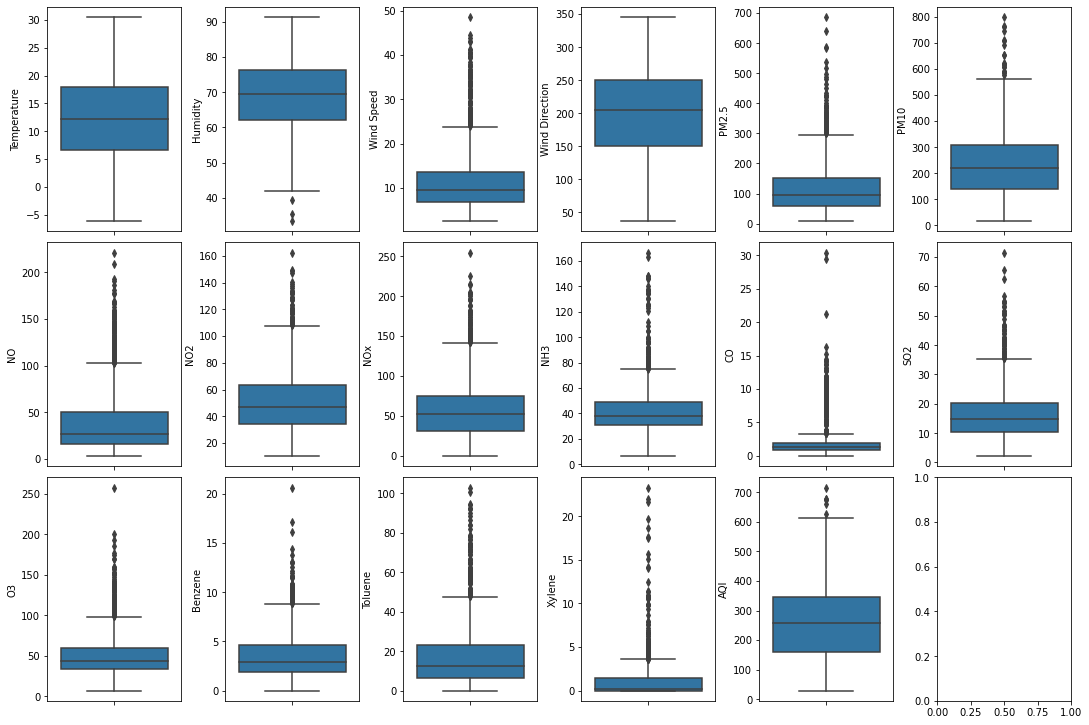

In [510]:
fig, ax = plt.subplots(ncols=6, nrows=3, figsize=(15, 10))
ax = ax.flatten()
index = 0
for i in Delhi_air_weather.drop(['Date', 'AQI_Bucket','Year','Month', 'MonthNr', 'Season'],axis=1).columns:
    sns.boxplot(y=i, data=Delhi_air_weather, ax=ax[index])
    index +=1
plt.tight_layout(pad=0.4)
plt.show()

Check for number of outliers:

In [511]:
for i in Delhi_air_weather.drop(['Date', 'AQI_Bucket','Year','Month', 'MonthNr', 'Season'],axis=1).columns:
    Delhi_air_weather.sort_values(by=i, ascending=True, na_position='last')
    q1, q3 = Delhi_air_weather[i].quantile([0.25,0.75])
    iqr = q3-q1
    lower_bound = q1-(1.5*iqr)
    upper_bound = q3+(1.5*iqr)
    outlier_data = Delhi_air_weather[i][(Delhi_air_weather[i] < lower_bound) | (Delhi_air_weather[i] > upper_bound)] #creating a series of outlier data
    perc = (outlier_data.count()/Delhi_air_weather[i].count())*100
    print('Outliers in %s is %.2f%% with count %.f' %(i, perc, outlier_data.count()))


Outliers in Temperature is 0.00% with count 0
Outliers in Humidity is 0.15% with count 3
Outliers in Wind Speed is 6.17% with count 124
Outliers in Wind Direction is 0.00% with count 0
Outliers in PM2.5 is 3.63% with count 73
Outliers in PM10 is 0.95% with count 19
Outliers in NO is 6.62% with count 133
Outliers in NO2 is 2.54% with count 51
Outliers in NOx is 3.93% with count 79
Outliers in NH3 is 4.08% with count 82
Outliers in CO is 9.21% with count 185
Outliers in SO2 is 2.89% with count 58
Outliers in O3 is 5.62% with count 113
Outliers in Benzene is 4.18% with count 84
Outliers in Toluene is 4.93% with count 99
Outliers in Xylene is 5.57% with count 112
Outliers in AQI is 0.30% with count 6


As we can see above, the amount of outliers are all less than 10% of the dataset, mostly around 1-5%, which is in acceptable range. So, we can leave that aside because it doesn effect modelling really much. However, we can also try to treat outlier ti compare the accuracy score after modelling to see how the outlier treatment can affect accuracy score.

In [512]:
Delhi_treated = Delhi_air_weather.copy()
def treat_outlier(col):
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range = Q1-(1.5*IQR)
    upper_range = Q3+(1.5*IQR)
    return lower_range, upper_range

for i in Delhi_treated.drop(['Date', 'AQI_Bucket','Year','Month', 'MonthNr', 'Season'],axis=1).columns:
    low_range, up_range = treat_outlier(Delhi_treated[i])
    mean = Delhi_treated[i].mean()
    Delhi_treated[i] = np.where(Delhi_treated[i] > up_range, up_range, Delhi_treated[i])
    Delhi_treated[i] = np.where(Delhi_treated[i] < low_range, low_range, Delhi_treated[i])

## 4.2 Feature selection
### 4.2.1 Heatmap

<AxesSubplot:>

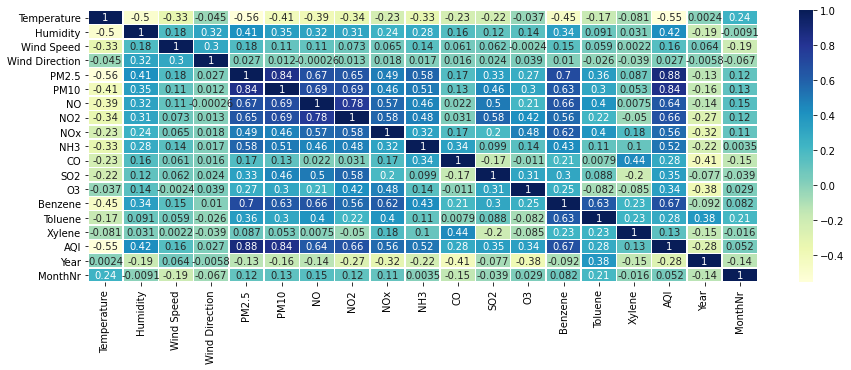

In [513]:
fig, ax = plt.subplots(figsize=(15,5))   
sns.heatmap(Delhi_air_weather.corr(), cmap="YlGnBu", annot=True,linewidths=.5, ax=ax)

The heatmaps  give first impression that the polutant substances has more correlation with AQI rather than weather features. Polutant substances such as PM2.5, PM10, NO2 and CO have high correlation with AQI, and some of the polutant substances correlated with each other.

### 4.2.2 Backward Elimination

In [514]:
X = Delhi_air_weather.iloc[:, 1:-6]
Y = Delhi_air_weather.iloc[:, 17]

def BackwardElimination(sl, w):
    for i in range(0, len(w.columns)):
        regressor_OLS = sm.OLS(endog=Y, exog=w).fit()
        max_pvalue = max(regressor_OLS.pvalues)
        pvalues = regressor_OLS.pvalues
        if max_pvalue > SL:
            index_max_pvalue = pvalues[pvalues==max_pvalue].index
            w = w.drop(index_max_pvalue, axis = 1) #delete the valriable for that p value
    return w,pvalues,index_max_pvalue

SL = 0.05
ones = np.ones((2009,1))  #adding a columns of ones to X as it is required by statsmodels library
W = X
W.insert(0, 'Constant', ones, True)
W_optimal = W.iloc[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]]

W_optimal,pvalues,index_max_pvalue = BackwardElimination(SL, W_optimal)
X = W_optimal.drop('Constant', axis=1)

X.columns

Index(['Temperature', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'O3',
       'Toluene'],
      dtype='object')

The Backward Elimination feature selection already suggests variables that can be used to calculate AQI, which are 'Temperature', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'O3', and 'Toluene'. However, as Humidity and Wind are some of the meteological feature that go closely with Temperature, which can also affect the AQI. Therefore, Humidity and Wind, although are not suggested by Backward Elimination techniques, will not be deleted for future analysis below. Others variables will be deleted as suggested by Backward Elimination.

In [515]:
Cities_air_weather = Cities_air_weather[Cities_air_weather['City']=='Delhi']
Delhi_air_weather=Delhi_air_weather.drop(['Humidity','Wind Speed','Wind Direction'],axis=1)
Delhi_treated=Delhi_treated.drop(['Humidity','Wind Speed','Wind Direction'],axis=1)
Cities_air_weather=Cities_air_weather.drop(['Precipitation', 'Humidity',
       'Sea Level Pressure', 'Wind Speed', 'Wind Gust', 'City', 'lat', 'lon'],axis=1)

## 4.3 Finalize train-test data

In [516]:
x_train = Delhi_air_weather.iloc[:, 1:-6]
Y_train = Delhi_air_weather['AQI']
x_test = Cities_air_weather.iloc[:, 1:-7]
Y_test = Cities_air_weather['AQI']

In [517]:
# for outlier-treated data
x_train_treated = Delhi_treated.iloc[:, 1:-6]
Y_train_treated = Delhi_treated['AQI']
#x_test_treated = Cities_air_weather.iloc[:, 1:-7]
#Y_test_treated = Cities_air_weather['AQI']

## 4.4 Normalization

In [518]:
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
X_train= st_x.fit_transform(x_train)    
X_test= st_x.transform(x_test) 
# for outlier-treated data
X_train_treated= st_x.fit_transform(x_train_treated)    
#X_test_treated= st_x.transform(x_test_treated) 


## 4.5 Model selection

The AQI in correlation map when performing EDA has shown some correlation with most of the feature, so we can consider it as Regression problem. Multiple Regression models will be applied and evaluated to get the most suitable one. The regression models applied can include Linear regression, Polynomial regression, Support vector regression, Decision tree regression and K-Nearest Neighbor regression model.

As the dataset in timeseries format and the features such as Tempurature, humidity, AQI and some another pollutants have seasonality pattern, so I considered applied Time Series models. The models used for time series here are Prophet and VAR. Prophet is a s an open-source algorithm developed by Facebook, supposed to perform well with seasonal data and can handle outliers as well as missing value well. While VAR is good at generalize the single-variable (univariate) autoregressive model by allowing for multivariate time series.


# 5. Modelling

## 5.1 Regression models

### 5.1.1 Linear regression model

In [519]:
linear = lr()
linear.fit(X_train, Y_train)
Y_pred = linear.predict(X_test)
Y_compare_linear = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
Y_compare_linear.tail(10)

Actual   Predicted
74   113.0  112.080239
75   108.0  118.373217
76   127.0  141.749535
77   133.0  137.676661
78   123.0  127.678829
79   165.0  181.316357
80   208.0  205.861908
81   243.0  199.599369
82   235.0  201.867766
83   282.0  239.991900

### 5.1.2 Polynomial regression model

In [520]:
polyRegressor = PolynomialFeatures(degree=3)
#X_train_poly = polyRegressor.fit_transform(X_train)
#X_test_poly = polyRegressor.fit_transform(X_test)
poly = lr()
poly.fit(X_train, Y_train)
Y_pred = poly.predict(X_test)
Y_compare_poly = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
Y_compare_poly.tail(10)

Actual   Predicted
74   113.0  112.080239
75   108.0  118.373217
76   127.0  141.749535
77   133.0  137.676661
78   123.0  127.678829
79   165.0  181.316357
80   208.0  205.861908
81   243.0  199.599369
82   235.0  201.867766
83   282.0  239.991900

### 5.1.3 Support vector regression model

In [521]:
svr = SVR(kernel= 'linear', gamma='scale')
svr.fit(x_train,Y_train)
Y_pred = svr.predict(x_test)
Y_compare_svr = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
Y_compare_svr.tail(10) 

Actual   Predicted
74   113.0  107.708542
75   108.0  114.080988
76   127.0  140.646373
77   133.0  136.947751
78   123.0  124.422764
79   165.0  178.687344
80   208.0  207.369811
81   243.0  199.775901
82   235.0  202.783667
83   282.0  242.806042

### 5.1.4 Decission tree regression model

In [522]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train,Y_train)
Y_pred = rf.predict(X_test)
Y_compare_randomforrest = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
Y_compare_randomforrest.tail(10)

Actual  Predicted
74   113.0     114.25
75   108.0     113.86
76   127.0     134.47
77   133.0     133.25
78   123.0     126.06
79   165.0     173.48
80   208.0     221.91
81   243.0     238.93
82   235.0     238.66
83   282.0     271.73

### 5.1.5 K-Nearest Neighbour regression model:

In [523]:
knn = KNeighborsRegressor(n_neighbors=13)
knn.fit(X_train,Y_train)
Y_pred = knn.predict(X_test)
Y_compare_knn = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
Y_compare_knn.tail(10)

Actual   Predicted
74   113.0  116.230769
75   108.0  114.923077
76   127.0  133.846154
77   133.0  123.461538
78   123.0  116.461538
79   165.0  170.384615
80   208.0  201.153846
81   243.0  184.923077
82   235.0  187.000000
83   282.0  248.846154

## 5.2 Regression validation
### 5.2.1 Plotting comparision of actual and predicted values different regression machine learning models

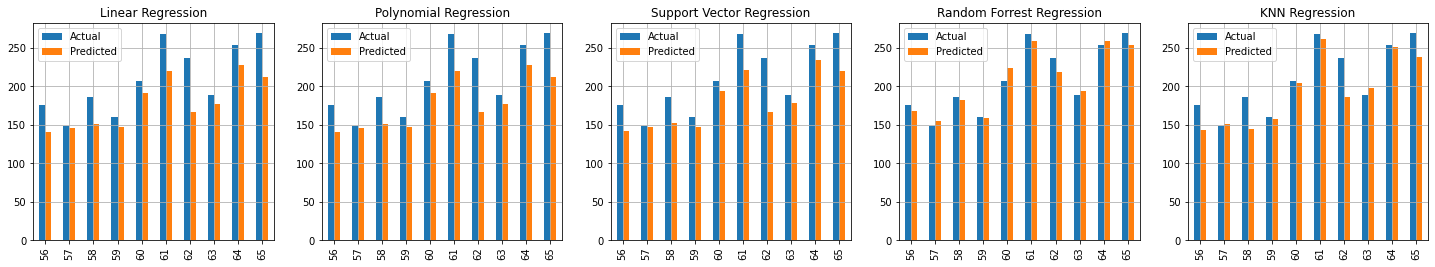

In [524]:
fig, ax = plt.subplots(ncols=5, nrows=1, figsize=(25, 4))
ax = ax.flatten()
Y_compare_linear.head(10).plot(kind='bar', title='Linear Regression', grid=True, ax=ax[0])
Y_compare_poly.head(10).plot(kind='bar', title='Polynomial Regression', grid=True, ax=ax[1])
Y_compare_svr.head(10).plot(kind='bar', title='Support Vector Regression', grid=True, ax=ax[2])
Y_compare_randomforrest.head(10).plot(kind='bar', title='Random Forrest Regression', grid=True, ax=ax[3])
Y_compare_knn.head(10).plot(kind='bar', title='KNN Regression', grid=True, ax=ax[4])
plt.show()

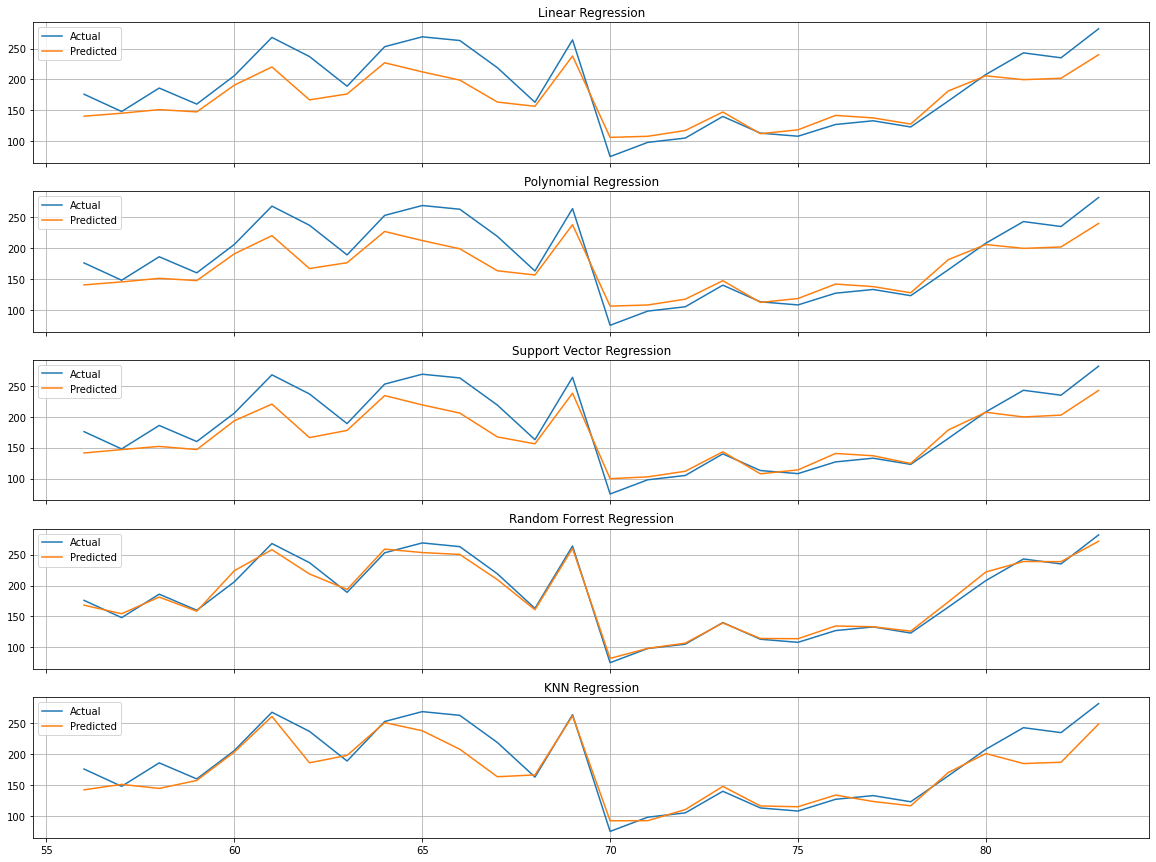

In [525]:
fig, ax = plt.subplots(ncols=1, nrows=5, figsize=(20, 15), sharex=True)
ax = ax.flatten()
Y_compare_linear.plot(kind='line', title='Linear Regression', grid=True, ax=ax[0])
Y_compare_poly.plot(kind='line', title='Polynomial Regression', grid=True, ax=ax[1])
Y_compare_svr.plot(kind='line', title='Support Vector Regression', grid=True, ax=ax[2])
Y_compare_randomforrest.plot(kind='line', title='Random Forrest Regression', grid=True, ax=ax[3])
Y_compare_knn.plot(kind='line', title='KNN Regression', grid=True, ax=ax[4])
plt.show()

**Findings:** As seen from the graph above, Random Forest Regression seems to be the best regression model to predict AQI. We can evaluate this by calculate accuracy score in cross validation

### 5.2.2 R2 Cross validation:

Evaluate the performed regression machine learning model on the air quality dataset with R2 score cross validation. The idea of cross validation is to use a limited sample in order to estimate how the model is expected to perform in general when used to make predictions on data not used during the training of the model.

In [526]:
modelNames = ['Linear', 'Polynomial', 'Support Vector', 'Random Forrest', 'K-Nearest Neighbour']
modelRegressors = [linear, poly, svr, rf, knn]
models = pd.DataFrame({'modelNames' : modelNames, 'modelRegressors' : modelRegressors})
counter=0
score=[]
for i in models['modelRegressors']:
    accuracy = cvs(i, X_train, Y_train, scoring='r2', cv=5)
    print('Accuracy of %s Regression model is %.2f' %(models.iloc[counter,0],accuracy.mean()))
    score.append(accuracy.mean())
    counter+=1

Accuracy of Linear Regression model is 0.76
Accuracy of Polynomial Regression model is 0.76
Accuracy of Support Vector Regression model is 0.79
Accuracy of Random Forrest Regression model is 0.82
Accuracy of K-Nearest Neighbour Regression model is 0.75


**Findings:** From the above results, we can summaries that Random Forrest Regression model gives the best score and can be used to predict AQI the best.

### 5.2.3 Comparison on data with outlier treated:

In [527]:
modelNames = ['Linear', 'Polynomial', 'Support Vector', 'Random Forrest', 'K-Nearest Neighbour']
modelRegressors = [linear, poly, svr, rf, knn]
models = pd.DataFrame({'modelNames' : modelNames, 'modelRegressors' : modelRegressors})
counter=0
score=[]
for i in models['modelRegressors']:
    accuracy = cvs(i, X_train_treated, Y_train_treated, scoring='r2', cv=5)
    print('Accuracy of %s Regression model is %.2f' %(models.iloc[counter,0],accuracy.mean()))
    score.append(accuracy.mean())
    counter+=1

Accuracy of Linear Regression model is 0.77
Accuracy of Polynomial Regression model is 0.77
Accuracy of Support Vector Regression model is 0.77
Accuracy of Random Forrest Regression model is 0.82
Accuracy of K-Nearest Neighbour Regression model is 0.73


**Findings:** From the above results, we can see that the accuracy score for dataset with treated ouliers has higher accuracy. However, the differences are not noticiable. So we can say that we do not need to treat outliers in this data. 

### 5.2.4 Hyperparameter Tuning:

Apply GridSearch CV to the model that get highest accuracy score in cross validation to see if we can increase the score:

In [528]:
def Grid_Search_CV_RFR(X_train, y_train):

    estimator = RandomForestRegressor()
    param_grid = { 
            "n_estimators"      : [10,20,30],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            }

    grid = GridSearchCV(estimator, param_grid, n_jobs=-1, cv=5)

    grid.fit(X_train, y_train)

    return grid.best_score_ , grid.best_params_

Grid_Search_CV_RFR(X_train, Y_train)

(0.832860812263203,
 {'bootstrap': True,
  'max_features': 'auto',
  'min_samples_split': 4,
  'n_estimators': 30})

The best score can get for Random forrest regressor is 0.82, little bit higher than 0.81.

## 5.3 Time series model 

### 5.3.1 Dataset preparation 

In [529]:
from statsmodels.tsa.arima.model import ARIMA 
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math
from prophet import Prophet

In [530]:
#datatrain = Delhi_air_weather.iloc[:, 0:-5]
#datatest = Cities_air_weather[Cities_air_weather['Date'].dt.year == 2018].iloc[:, 0:-6]

datatrain=Delhi_air_weather.iloc[:-400, 0:-5]
datatest =Delhi_air_weather.iloc[-400:, 0:-5]

datatrain_treated=Delhi_treated.iloc[:-400, 0:-5]
datatest_treated =Delhi_treated.iloc[-400:, 0:-5]

#### Scaling

In [531]:
scaler = MinMaxScaler()
columns = ['Temperature', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene']
scaler.fit(np.array(datatrain[columns]))
datatest[columns] = scaler.transform(np.array(datatest[columns]))
datatrain[columns] = scaler.transform(np.array(datatrain[columns]))

#for treated dataset
scaler.fit(np.array(datatrain_treated[columns]))
datatest_treated[columns] = scaler.transform(np.array(datatest_treated[columns]))
datatrain_treated[columns] = scaler.transform(np.array(datatrain_treated[columns]))

In [532]:
datatrain.drop(['Date', 'AQI'],axis=1).describe()

Temperature        PM2.5         PM10           NO          NO2  \
count  1609.000000  1609.000000  1609.000000  1609.000000  1609.000000   
mean      0.506514     0.166618     0.293955     0.177774     0.285686   
std       0.198241     0.122225     0.152010     0.159914     0.152245   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.347334     0.078416     0.184122     0.067921     0.171199   
50%       0.490810     0.135719     0.286847     0.122137     0.264437   
75%       0.659217     0.224766     0.392412     0.238849     0.365312   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

               NOx          NH3           CO          SO2           O3  \
count  1609.000000  1609.000000  1609.000000  1609.000000  1609.000000   
mean      0.244197     0.230931     0.071201     0.210868     0.187265   
std       0.153134     0.115225     0.092579     0.124355     0.108262   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.137873     0.157954     0.030223     0.120052     0.116113   
50%       0.220840     0.207604     0.043035     0.198931     0.155389   
75%       0.315385     0.274137     0.065703     0.279399     0.229036   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

           Benzene      Toluene       Xylene  
count  1609.000000  1609.000000  1609.000000  
mean      0.177256     0.151066     0.043231  
std       0.124235     0.151365     0.091895  
min       0.000000     0.000000     0.000000  
25%       0.090116     0.055825     0.000000  
50%       0.150678     0.100485     0.001288  
75%       0.236434     0.200971     0.065665  
max       1.000000     1.000000     1.000000

#### Reset index

In [533]:
datatrain=datatrain.set_index('Date')
datatest =datatest.set_index('Date')

### 5.3.2 Check stationarity and tranforming

Augmented Dickey-Fuller (ADF) test is a type of statistical test called a unit root test. Unit roots are a cause for non-stationarity.
-Null Hypothesis (H0): Time series has a unit root. (Time series is not stationary).

-Alternate Hypothesis (H1): Time series has no unit root (Time series is stationary).
If the null hypothesis can be rejected, we can conclude that the time series is stationary. There are two ways to rejects the null hypothesis:

On the one hand, the null hypothesis can be rejected if the p-value is below a set significance level. The defaults significance level is 5%

**p-value > significance level (default: 0.05)**: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.

**p-value <= significance level (default: 0.05)**: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.
On the other hand, the null hypothesis can be rejects if the test statistic is less than the critical value.

**ADF statistic > critical value**: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.

**ADF statistic < critical value**: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

In [534]:
result = adfuller(datatrain['AQI'].values)
result

(-3.1881658462180438,
 0.020679987079658475,
 17,
 1591,
 {'1%': -3.4344668334240493,
  '5%': -2.8633583388041717,
  '10%': -2.5677380487468597},
 16940.5799930723)

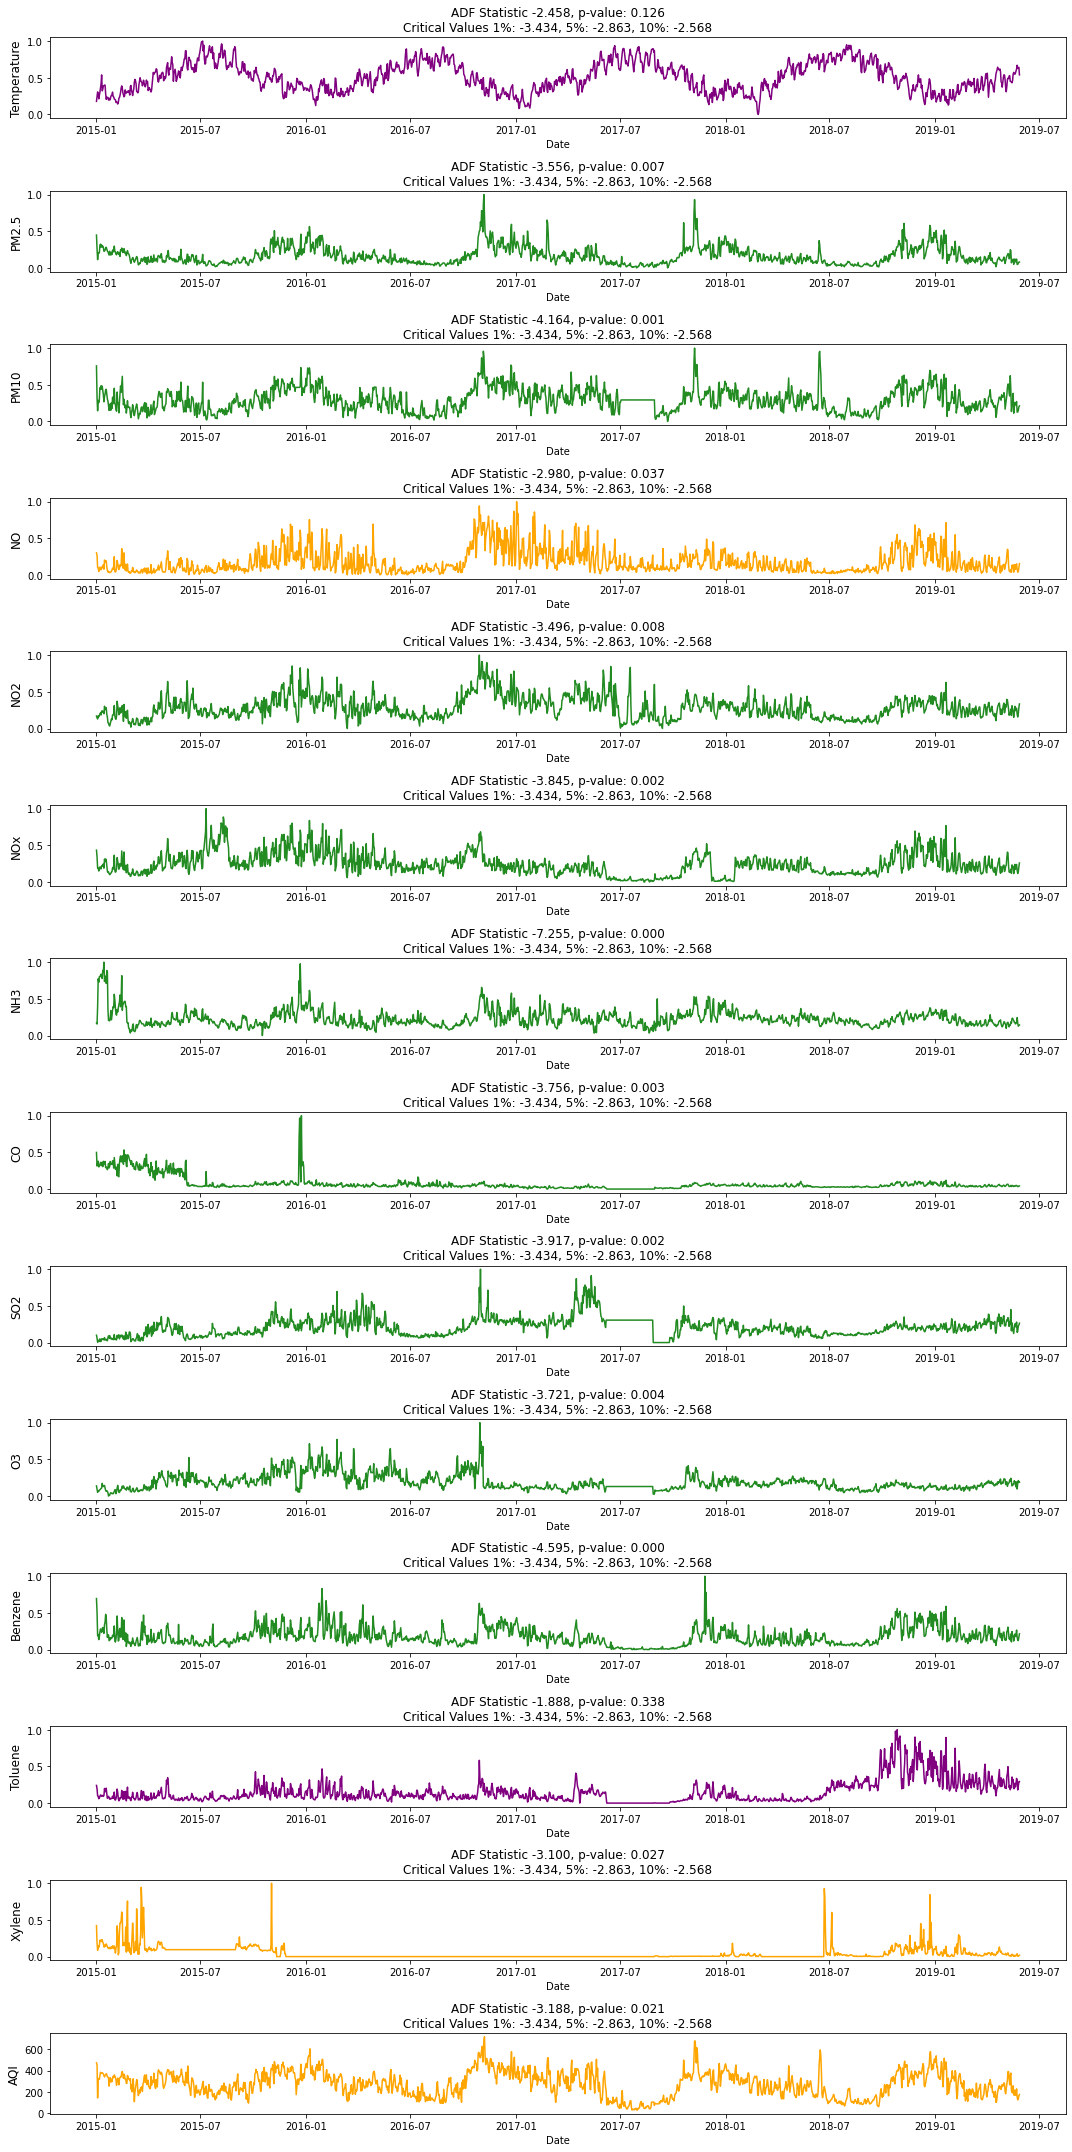

In [535]:
f, ax = plt.subplots(nrows=14, figsize=(15, 30))

def visualize_adfuller_results(series, title, ax):
    result = adfuller(series)
    significance_level = 0.05
    adf_stat = result[0]
    p_val = result[1]
    crit_val_1 = result[4]['1%']
    crit_val_5 = result[4]['5%']
    crit_val_10 = result[4]['10%']

    if (p_val < significance_level) & ((adf_stat < crit_val_1)):
        linecolor = 'forestgreen' 
    elif (p_val < significance_level) & (adf_stat < crit_val_5):
        linecolor = 'orange'
    elif (p_val < significance_level) & (adf_stat < crit_val_10):
        linecolor = 'red'
    else:
        linecolor = 'purple'
    sns.lineplot(x=datatrain.index, y=series, ax=ax, color=linecolor)
    ax.set_title(f'ADF Statistic {adf_stat:0.3f}, p-value: {p_val:0.3f}\nCritical Values 1%: {crit_val_1:0.3f}, 5%: {crit_val_5:0.3f}, 10%: {crit_val_10:0.3f}')
    ax.set_ylabel(ylabel=title, fontsize=12)

index = 0
for column in datatrain.columns:
    visualize_adfuller_results(datatrain[column].values, column, ax[index])
    index+=1


plt.tight_layout()
plt.show()

non-stationary: Temperature, Toluene, CO

stationary: rest of the variables

To use the ARIMA, the data requires stationary, so we can transformed it into stationary:

-Transformation: e.g. log or square root to stabilize non-constant variance

-Differencing: subtracts the current value from the previous

#### Transforming

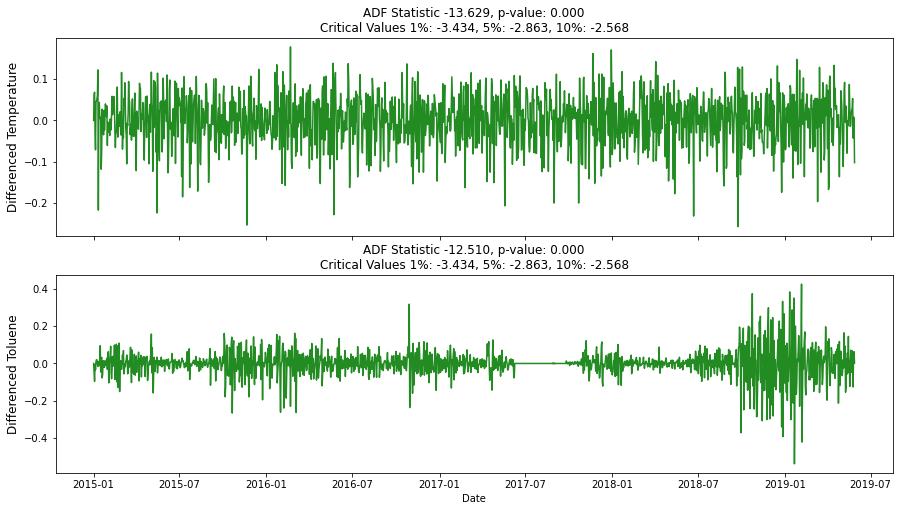

In [536]:
temp_diff = np.diff(datatrain['Temperature'])
datatrain['Temperature_diff'] = np.append([0], temp_diff)
toluene_diff = np.diff(datatrain['Toluene'])
datatrain['Toluene_diff'] = np.append([0], toluene_diff)

f, ax = plt.subplots(nrows=2, ncols=1,sharex=True, figsize=(15, 8))
visualize_adfuller_results(datatrain['Temperature_diff'], 'Differenced Temperature', ax[0])
visualize_adfuller_results(datatrain['Toluene_diff'], 'Differenced Toluene', ax[1])

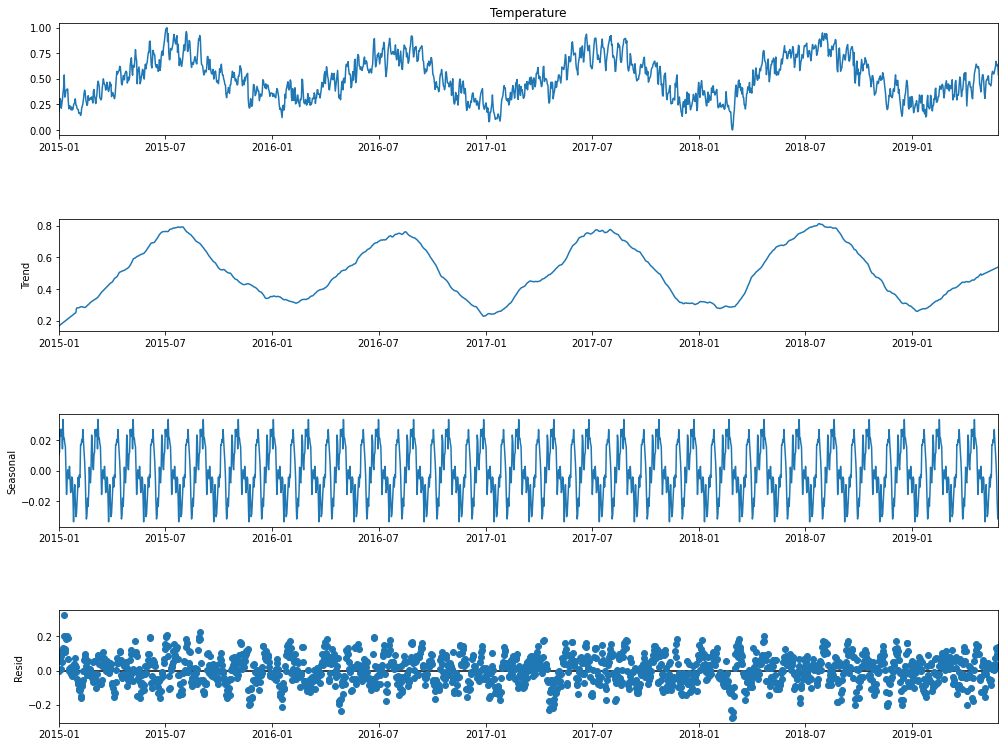

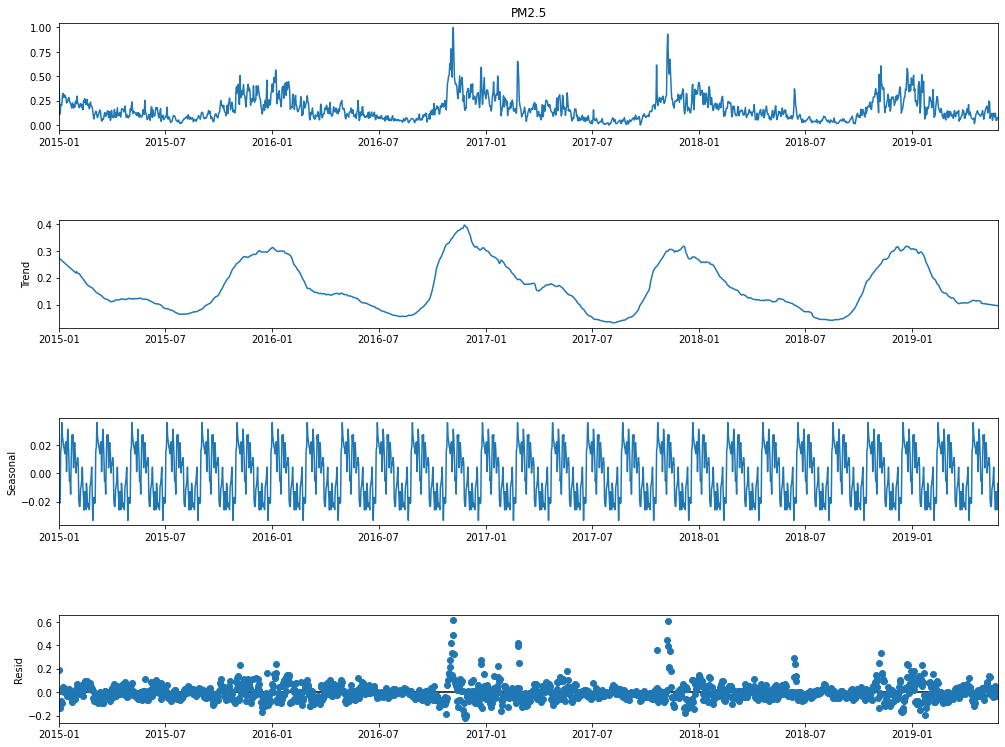

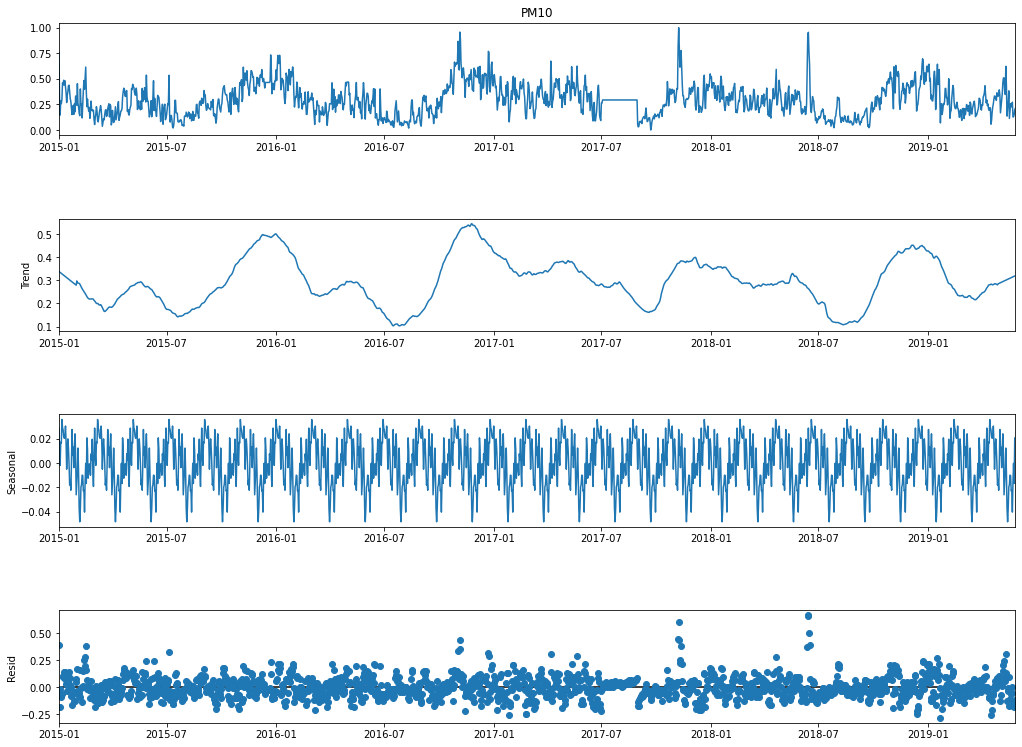

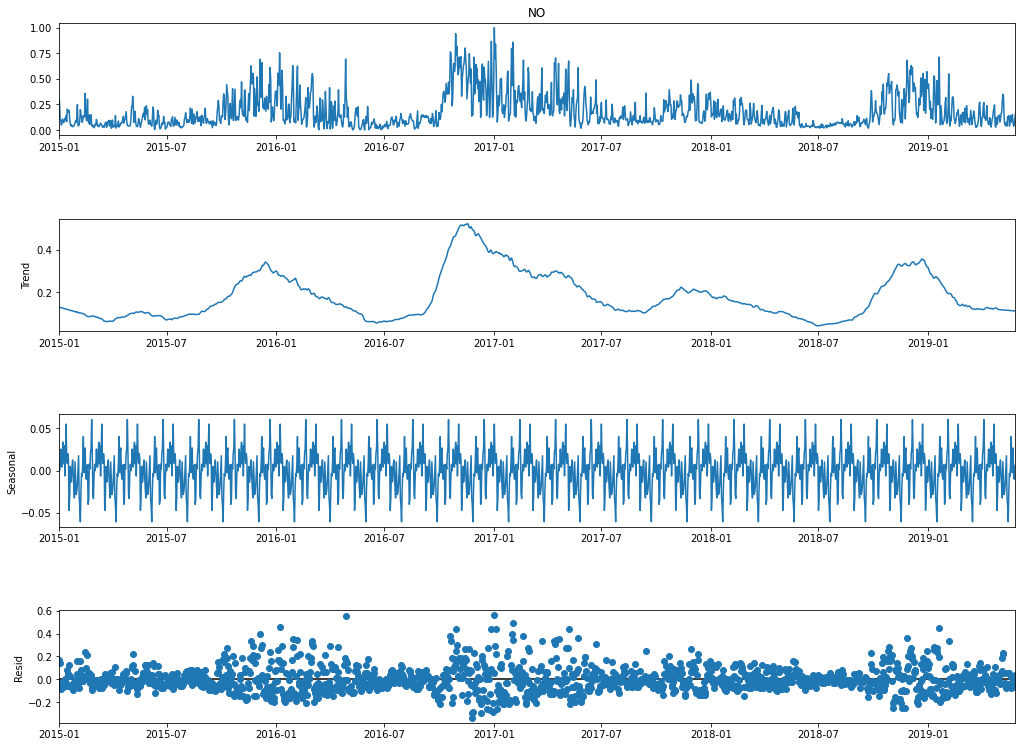

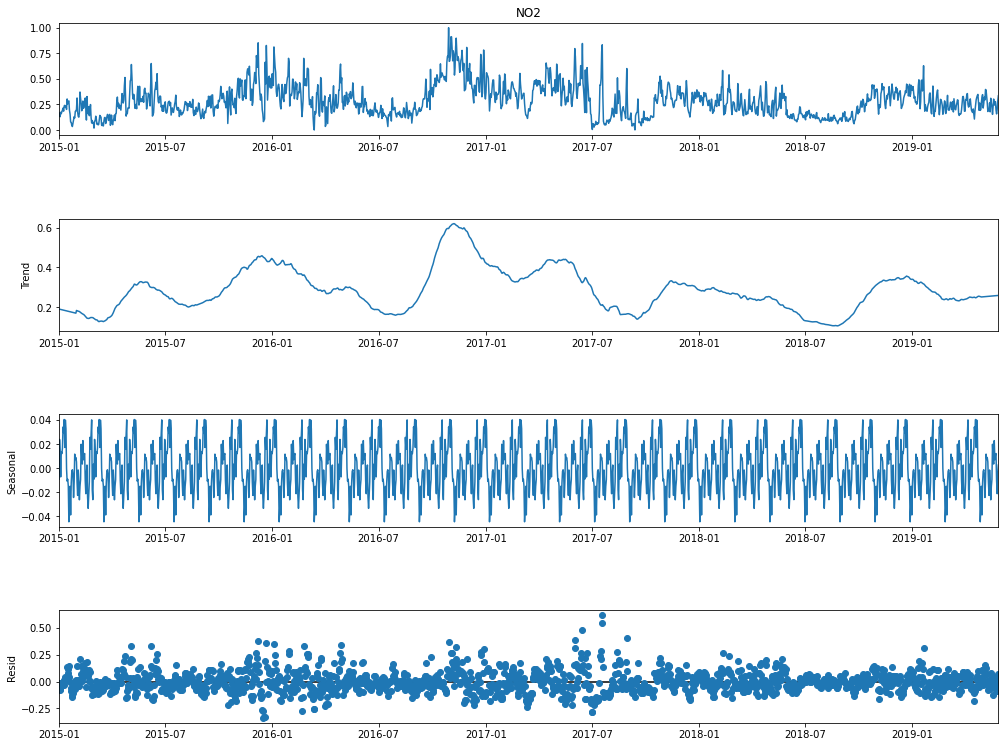

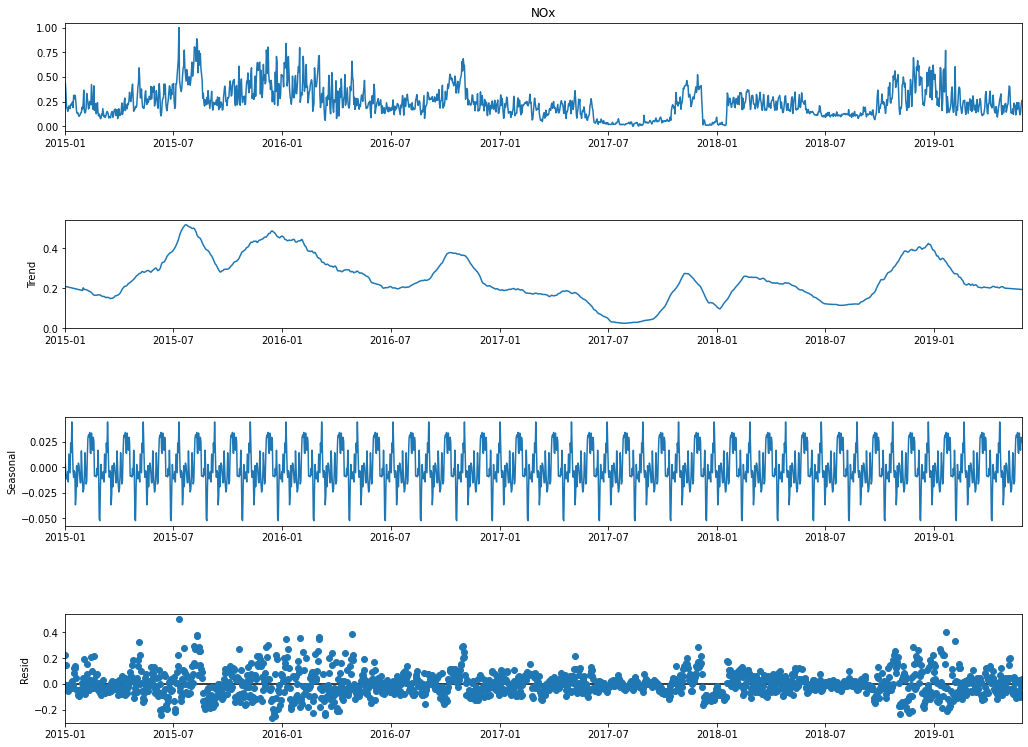

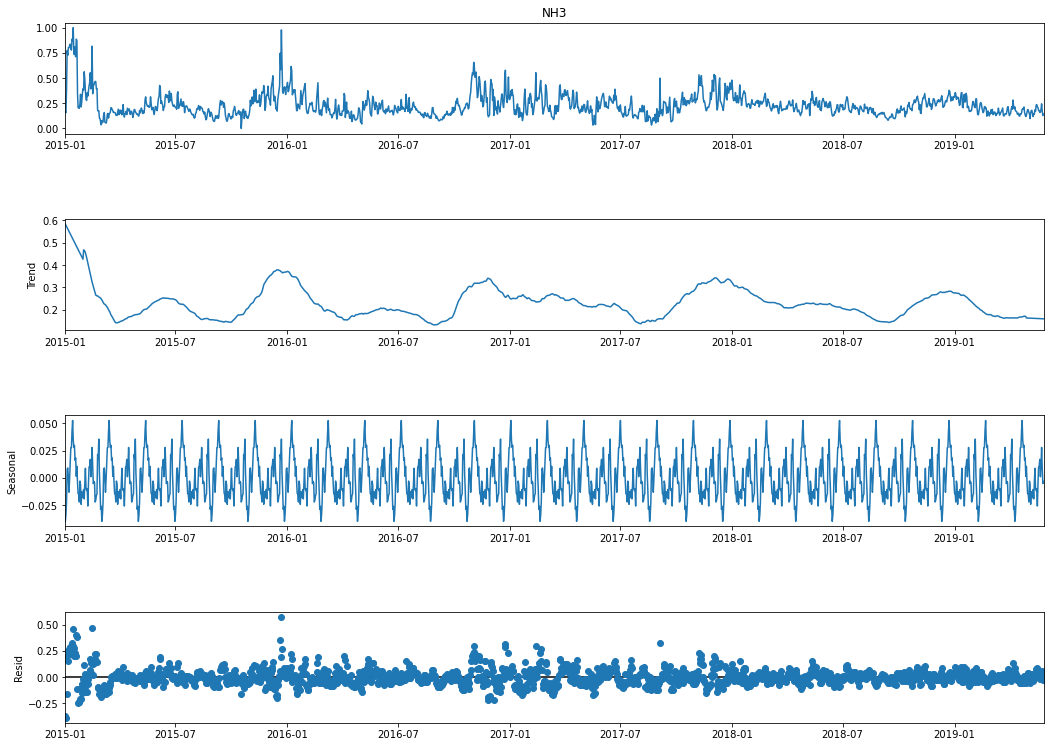

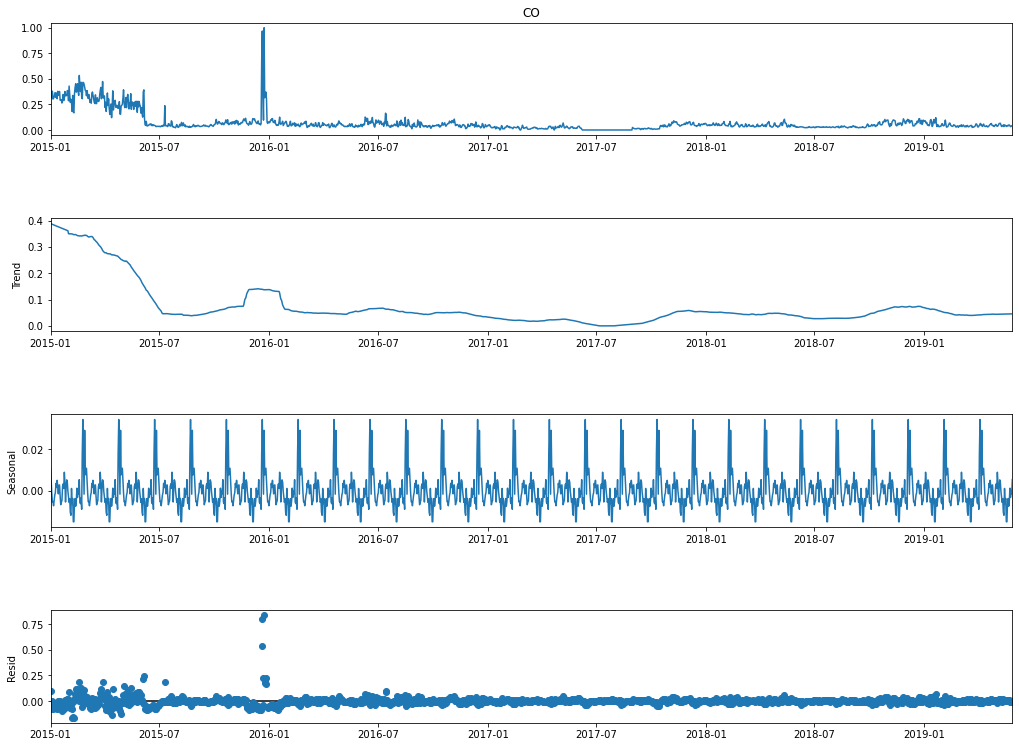

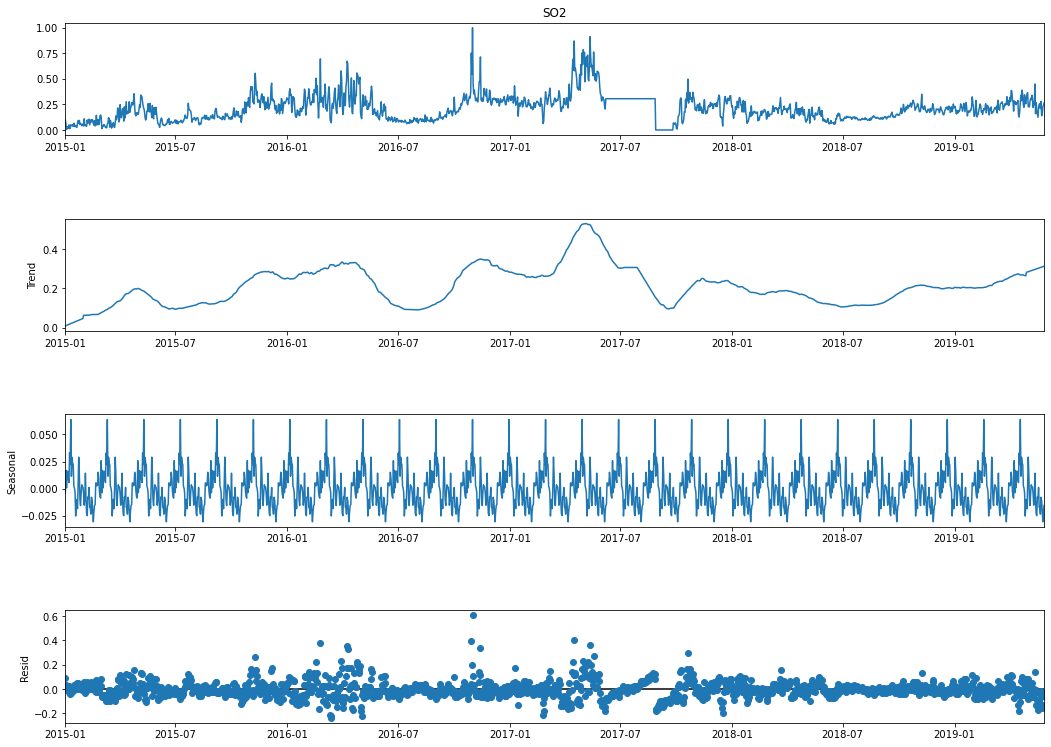

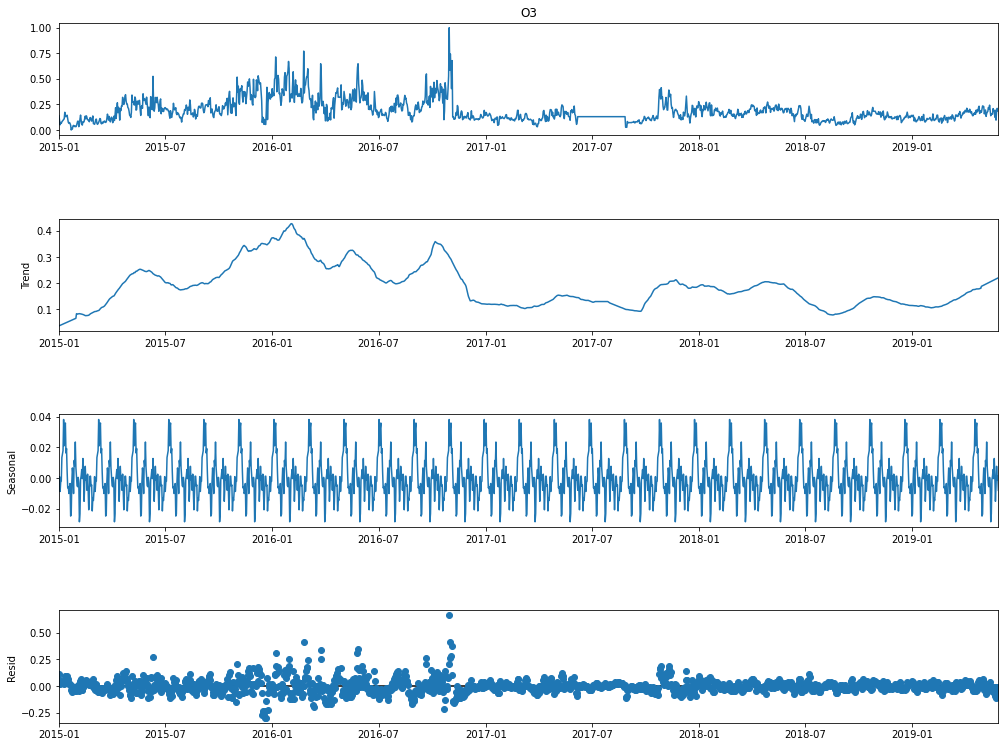

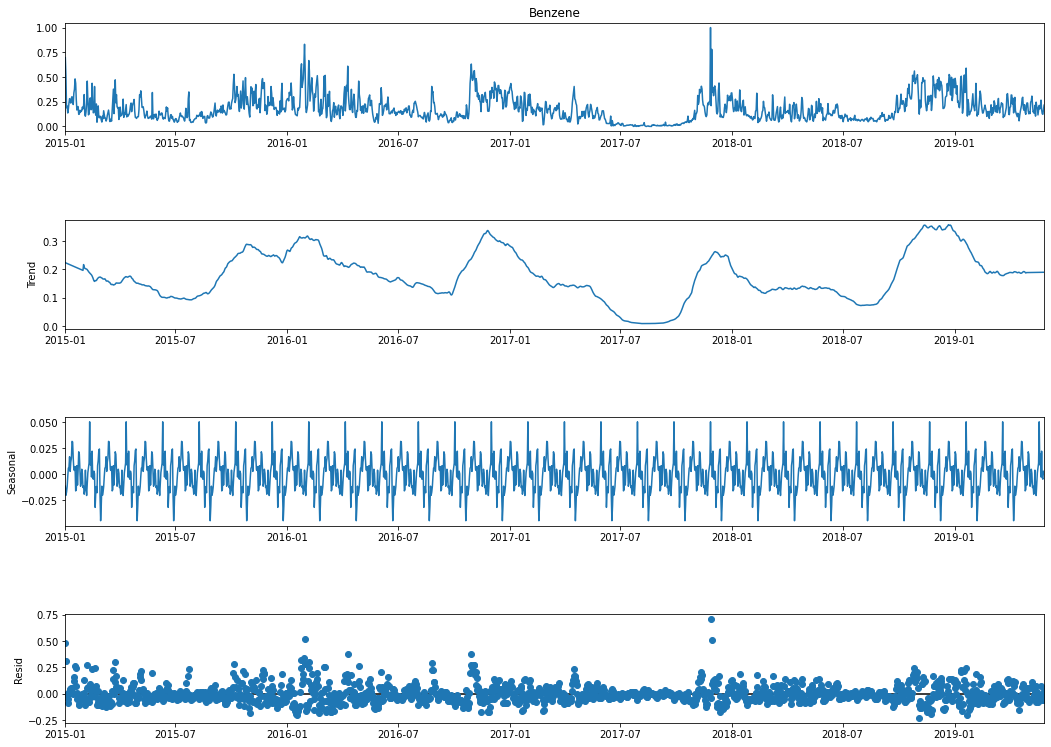

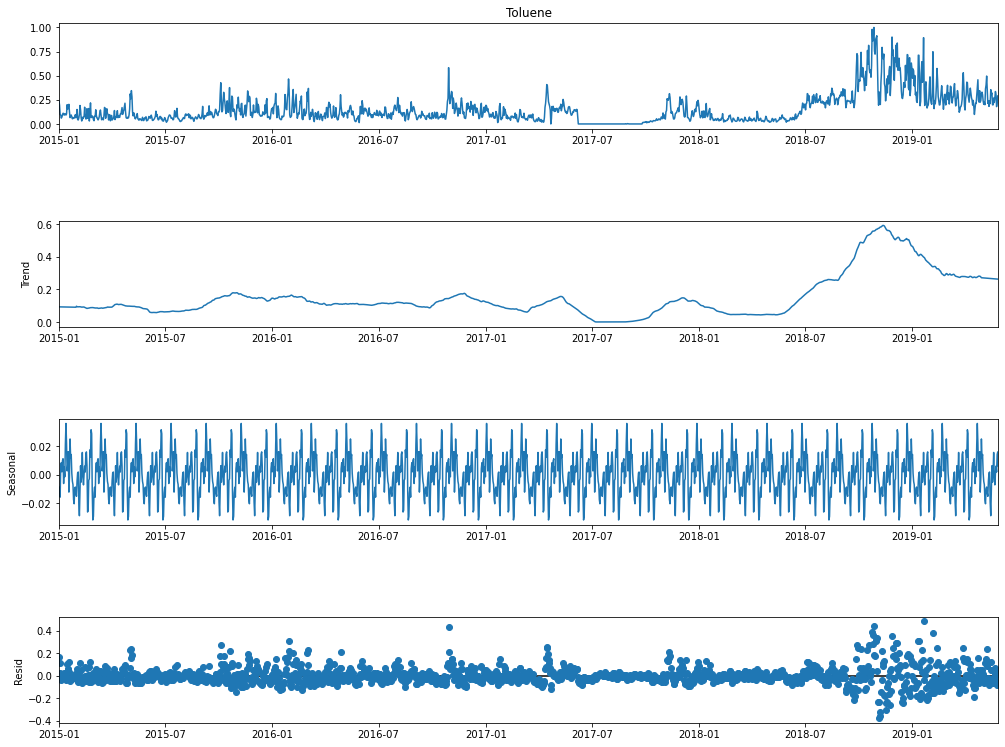

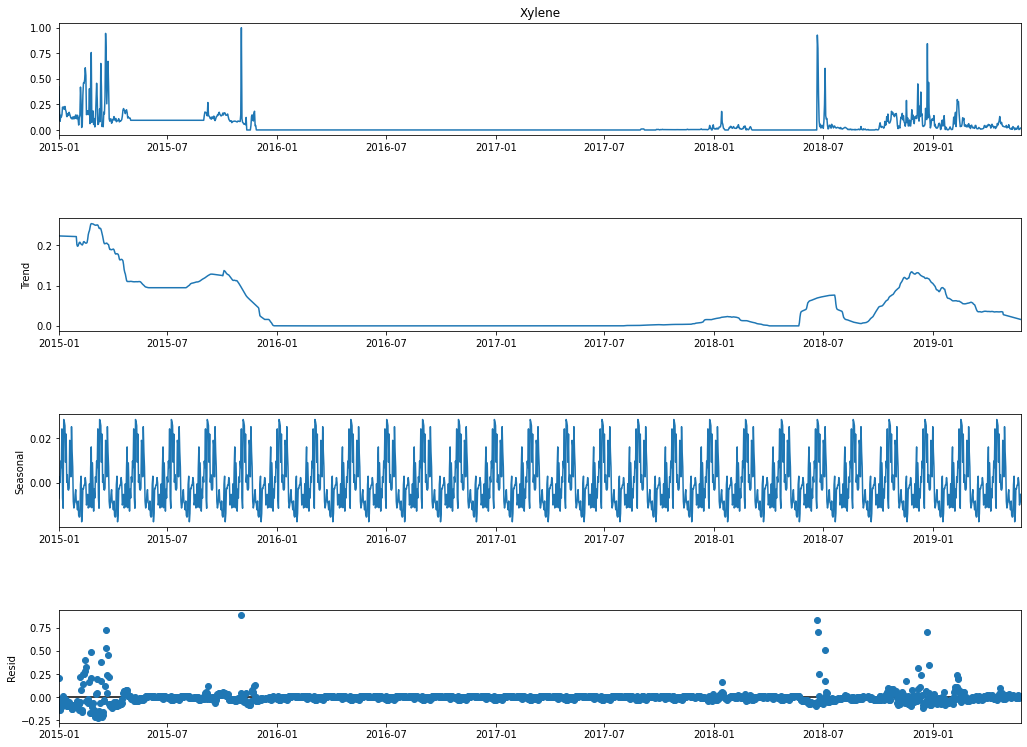

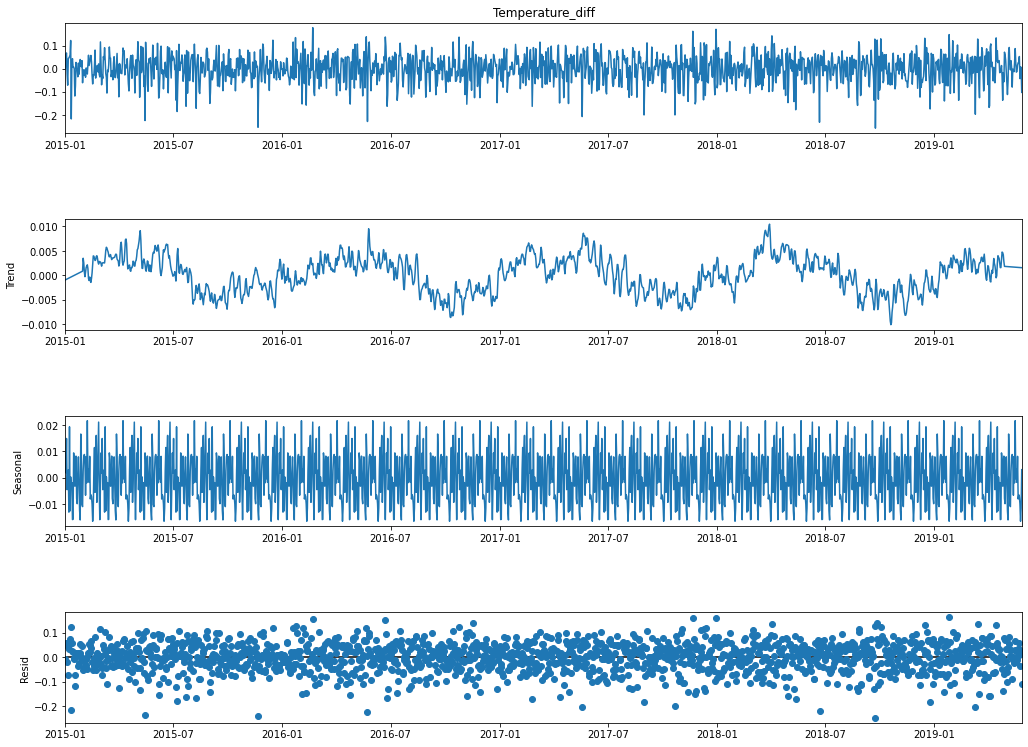

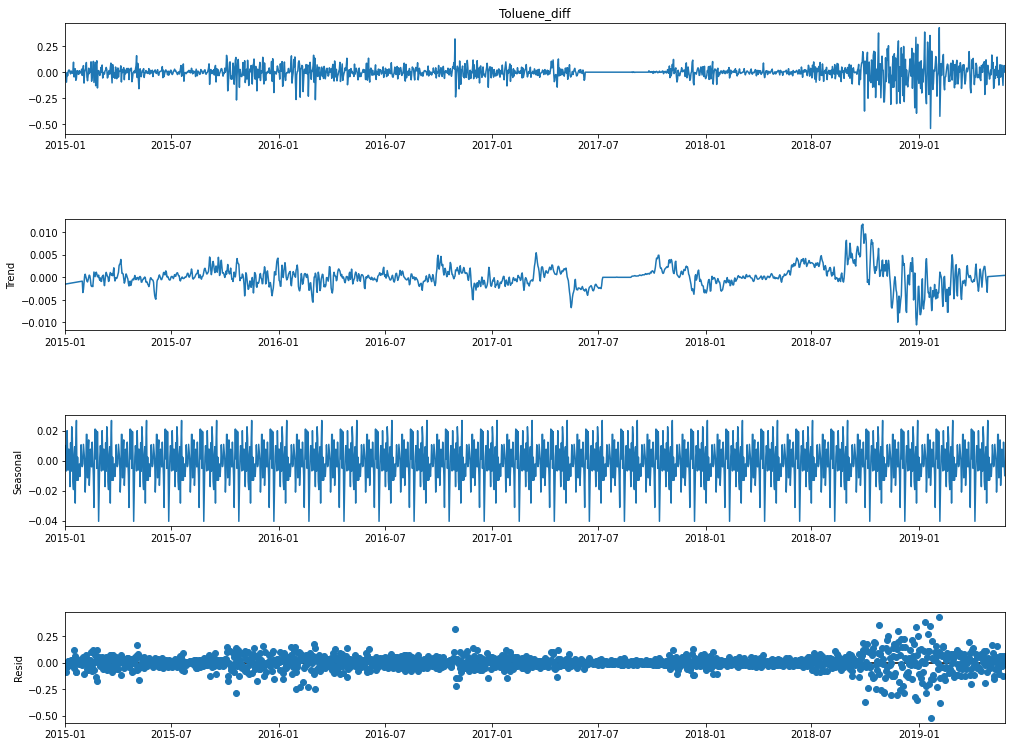

In [537]:
core_columns =  datatrain.drop('AQI',axis=1)

for column in core_columns:
    decomp = seasonal_decompose(datatrain[column], period=60, model='additive', extrapolate_trend='freq')
    #datatraining[f"{column}_trend"] = decomp.trend
    #datatraining[f"{column}_seasonal"] = decomp.seasonal
    fig = decomp.plot()
    fig.set_size_inches(16, 12)

### 5.3.3 Prophet model

Prophet is a procedure for forecasting time series data according to additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. Traditional model like ARIMA, SARIMA have many stringent data requirements like stationarity and equally spaced values and it is complicated when it comes to multivariate dataset. Other time forecasting model such as RNN, LSTM can be highly complex, and we choose Prophet also because they it is robust to missing data and handle outliers well.

https://facebook.github.io/prophet/

#### Make train test dataset

In [538]:
feature_columns = [
    'Temperature', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene'
]
target_column = ['AQI']

train= datatrain.reset_index()
train= train[['Date'] + target_column + feature_columns].copy()
train.columns = ['ds', 'y'] + feature_columns

test = datatest.reset_index()
test = test[['Date'] + target_column + feature_columns].copy()
test.columns = ['ds', 'y'] + feature_columns


x_train, y_train = pd.DataFrame(train.iloc[:, [0,2,3,4,5,6,7,8,9,10,11,12,13]]), pd.DataFrame(train.iloc[:, 1])
x_valid, y_valid = pd.DataFrame(test.iloc[:, [0,2,3,4,5,6,7,8,9,10,11,12,13]]), pd.DataFrame(test.iloc[:, 1])


In [539]:
model = Prophet()

for column in x_train.drop('ds',axis=1).columns:
    model.add_regressor(column)

# Fit the model with train set
model.fit(train)

# Predict on valid set
y_pred = model.predict(x_valid)

# Calcuate metrics
score_mae = mean_absolute_error(y_valid, y_pred['yhat'])
score_rmse = math.sqrt(mean_squared_error(y_valid, y_pred['yhat']))

print('RMSE: {}'.format(score_rmse))

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE: 41.907952575398866


### Validation

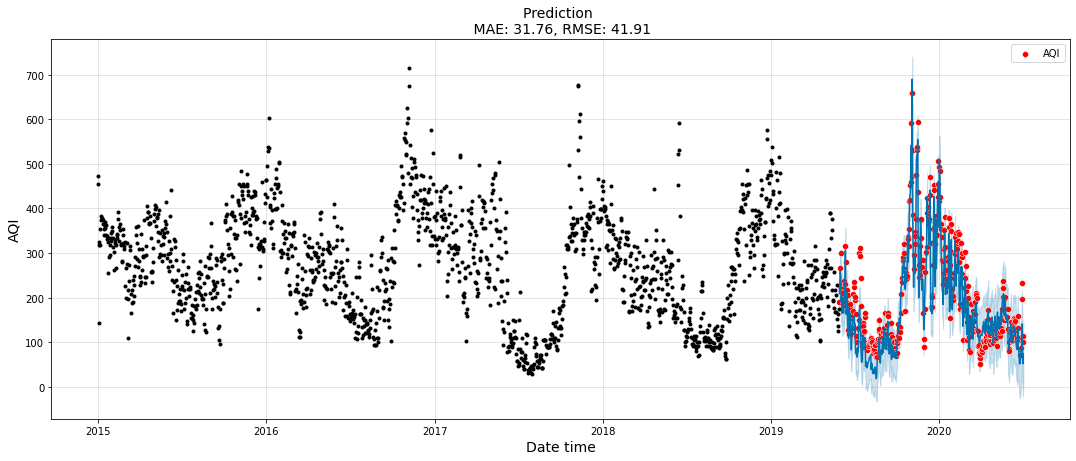

In [540]:
# Plot the forecast
f, ax = plt.subplots(1)
f.set_figheight(6)
f.set_figwidth(15)

model.plot(y_pred, ax=ax)
sns.scatterplot(x=x_valid['ds'], y=y_valid['y'], ax=ax, color='red', label='AQI') 

ax.set_title(f'Prediction \n MAE: {score_mae:.2f}, RMSE: {score_rmse:.2f}', fontsize=14)
ax.set_xlabel(xlabel='Date time', fontsize=14)
ax.set_ylabel(ylabel='AQI', fontsize=14)

plt.show()

Based on a rule of thumb, it can be said that RMSE (Root Mean Square Error)  values between 20 and 50 shows that the model can relatively predict the data accurately. In this case, the RSME is saying that the predicted value and the real one are different by the amount of 41 units. The RSME score for Prophet model is not perfect, but it still in good range, so we can say that this Prophet model can be used to predict AQI and it can get acceptable result.

### 5.3.4 VAR model

Vector autoregression (VAR) is a statistical model used to capture the relationship between multiple quantities as they change over time. VAR is a type of stochastic process model. VAR models generalize the single-variable (univariate) autoregressive model by allowing for multivariate time series.
https://en.wikipedia.org/wiki/Vector_autoregression

In [541]:
train=Delhi_air_weather.iloc[:-400, 0:-5].set_index('Date')
test =Delhi_air_weather.iloc[-400:, 0:-5].set_index('Date')

#train = pd.DataFrame(datatrain2.iloc[:, [0,2,3,4,5,6,7,8,9,10,11,12,13]])
#valid = pd.DataFrame(datatest2.iloc[:, [0,2,3,4,5,6,7,8,9,10,11,12,13]])

In [542]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1609 entries, 2015-01-01 to 2019-05-28
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  1609 non-null   float64
 1   PM2.5        1609 non-null   float64
 2   PM10         1609 non-null   float64
 3   NO           1609 non-null   float64
 4   NO2          1609 non-null   float64
 5   NOx          1609 non-null   float64
 6   NH3          1609 non-null   float64
 7   CO           1609 non-null   float64
 8   SO2          1609 non-null   float64
 9   O3           1609 non-null   float64
 10  Benzene      1609 non-null   float64
 11  Toluene      1609 non-null   float64
 12  Xylene       1609 non-null   float64
 13  AQI          1609 non-null   float64
dtypes: float64(14)
memory usage: 188.6 KB


### Grid Search for Order P

In [543]:
from statsmodels.tsa.vector_ar.var_model import VAR

for i in [1,2,3,4,5,6,7,8,9,10,11,12,13]:
    model = VAR(train)
    results = model.fit(i)
    print('Order =', i)
    print('AIC: ', results.aic)
    print('BIC: ', results.bic)
    print()

Order = 1
AIC:  55.66613808259317
BIC:  56.36910870102922

Order = 2
AIC:  54.99807463251341
BIC:  56.35783971806999

Order = 3
AIC:  54.61187926284071
BIC:  56.62910475505306

Order = 4
AIC:  54.587885036501326
BIC:  57.26323797754816

Order = 5
AIC:  54.54685157005937
BIC:  57.88100010727626

Order = 6
AIC:  54.575626161047815
BIC:  58.569239549447914

Order = 7
AIC:  54.61555656599051
BIC:  59.26930517079252

Order = 8
AIC:  54.698523554201714
BIC:  60.013078853365236

Order = 9
AIC:  54.73426349671044
BIC:  60.71029808347866

Order = 10
AIC:  54.83837518862717
BIC:  61.47656277407696

Order = 11
AIC:  54.91116240548794
BIC:  62.21217782108737

Order = 12
AIC:  55.01004484338244
BIC:  62.97456404355571

Order = 13
AIC:  55.09157724683799
BIC:  63.72027731153786



As you keep on increasing the value of the P model becomes more complex. AIC penalizes the complex model.
As we can see, AIC begins to drop as we fit the more complex model but, after a certain amount of time AIC begins to increase again. It’s because AIC is punishing these models for being too complex.
VAR(5) returns the lowest score and after that again AIC starts increasing, hence we will build the VAR model of order 5.

In [544]:
from statsmodels.tsa.vector_ar.var_model import VAR
model = VAR(train)
result = model.fit(5)

#lagged_Values = train.values[-8:]
prediction = result.forecast(result.y, steps=len(test))

#converting predictions to dataframe
cols = train.columns
pred = pd.DataFrame(index=range(0,len(prediction)),columns=[cols])
for j in range(0,14):
    for i in range(0, len(prediction)):
        pred.iloc[i][j] = prediction[i][j]
        
#check rmse
for i in cols:
    print('rmse value for', i, 'is : ', math.sqrt(mean_squared_error(pred[i], test[i])))

rmse value for Temperature is :  6.478602719118997
rmse value for PM2.5 is :  82.43216315244491
rmse value for PM10 is :  127.12711194458927
rmse value for NO is :  27.45738942186554
rmse value for NO2 is :  21.215286298927044
rmse value for NOx is :  32.125070004779985
rmse value for NH3 is :  10.75889642524129
rmse value for CO is :  0.7575484892898579
rmse value for SO2 is :  5.659883511769931
rmse value for O3 is :  18.400819920376396
rmse value for Benzene is :  1.8029508527795546
rmse value for Toluene is :  13.450410147397701
rmse value for Xylene is :  1.2577643767140732
rmse value for AQI is :  127.42561201218757


**Findings:** As we can see from the RMSE table above, the RMSE for values such as pollutant substances and meoteorgolical substance is almost 0, which say that the different of predicted value and actual value are almost 0. However, the score for AQI is pretty high, in this case, we have to say that this model is not perfect fit to predict AQI, but to predict factors that can be used to calculate AQI.

In [545]:
pred

Temperature       PM2.5        PM10         NO        NO2        NOx  \
0     12.889017   74.549138  197.093334  37.812679  56.034574  63.007237   
1     14.041378   79.832138  203.538137  31.129952  50.123474  55.908638   
2     14.832948   71.338644   191.62147  29.853716  46.236385   51.54836   
3     15.081444   67.151918  187.799019  30.684382   45.63927  50.733886   
4     14.866433   72.164442  195.249134  34.737144  47.901153  54.144976   
..          ...         ...         ...        ...        ...        ...   
395   12.607343  120.415665  245.858376  42.469574  53.983284  61.662703   
396   12.607312  120.416178  245.859327   42.46983   53.98353  61.662439   
397   12.607282  120.416681  245.860261  42.470081  53.983772  61.662179   
398   12.607252  120.417174  245.861179  42.470327   53.98401  61.661921   
399   12.607223  120.417658   245.86208   42.47057  53.984244  61.661668   

           NH3        CO        SO2         O3   Benzene    Toluene    Xylene  \
0    31.951415  1.061993   19.07189  54.404699  4.080175  31.082239  0.505898   
1    31.508754  1.078432  18.538408  53.686119  3.939338  28.781792  0.438718   
2    30.544912  1.002242  17.408358  53.078484  3.432145  27.063066  0.276376   
3    29.855088  0.809743  17.428826  53.447001  3.336331  26.849949  0.301782   
4    30.348009  0.848424  17.774796  52.982389  3.515696  27.261773  0.485324   
..         ...       ...        ...        ...       ...        ...       ...   
395  42.634769  1.863387  17.186627  53.522605  3.617332  16.518054  0.909017   
396  42.634912  1.863373  17.186721  53.522715  3.617319  16.517694  0.908995   
397  42.635052   1.86336  17.186813  53.522823  3.617306  16.517341  0.908973   
398   42.63519  1.863347  17.186904  53.522929  3.617293  16.516994  0.908952   
399  42.635325  1.863334  17.186993  53.523032  3.617281  16.516652   0.90893   

            AQI  
0     193.16588  
1    199.863955  
2    197.301859  
3    189.330925  
4     193.37124  
..          ...  
395  267.005867  
396  267.006367  
397  267.006857  
398  267.007335  
399  267.007802  

[400 rows x 14 columns]

In [546]:
test = test.reset_index()
test

Date  Temperature  PM2.5    PM10     NO    NO2    NOx    NH3    CO  \
0   2019-05-29    12.463029  74.80  202.75  34.62  65.84  68.16  29.53  1.45   
1   2019-05-30    15.709696  85.21  246.05  69.58  71.80  97.80  33.50  1.75   
2   2019-05-31    18.744279  88.57  337.77  44.18  56.83  69.00  34.26  1.47   
3   2019-06-01    21.167613  95.40  298.35  45.28  57.24  69.74  40.73  1.56   
4   2019-06-02    22.860112  73.36  219.79  10.15  32.22  26.31  48.12  1.07   
..         ...          ...    ...     ...    ...    ...    ...    ...   ...   
395 2020-06-27    24.269279  39.80  155.94  10.88  21.46  22.47  31.43  0.87   
396 2020-06-28    21.448863  59.52  308.65  12.67  21.60  23.86  29.27  0.94   
397 2020-06-29    19.146363  44.86  184.12  10.50  21.57  21.94  27.97  0.88   
398 2020-06-30    19.410529  39.80   91.98   5.99  17.96  15.44  28.48  0.84   
399 2020-07-01    23.388029  54.01  128.66   6.33  21.05  16.81  29.06  0.97   

       SO2     O3  Benzene  Toluene  Xylene    AQI  
0    23.61  57.99     4.85    34.39    0.48  191.0  
1    21.99  49.58     7.68    51.27    1.09  226.0  
2    19.82  58.49     4.70    32.57    0.65  266.0  
3    21.54  64.56     5.58    34.60    0.86  300.0  
4    14.15  60.84     2.43    13.66    0.24  222.0  
..     ...    ...      ...      ...     ...    ...  
395  10.38  18.88     1.69    19.99    0.43  112.0  
396  10.70  18.05     1.71    25.13    1.74  196.0  
397  11.58  26.61     2.13    23.80    1.13  233.0  
398  10.51  37.29     1.57    16.37    0.49  114.0  
399  11.15  29.73     2.03    23.57    0.65  101.0  

[400 rows x 15 columns]

<AxesSubplot:xlabel='Date', ylabel='AQI'>

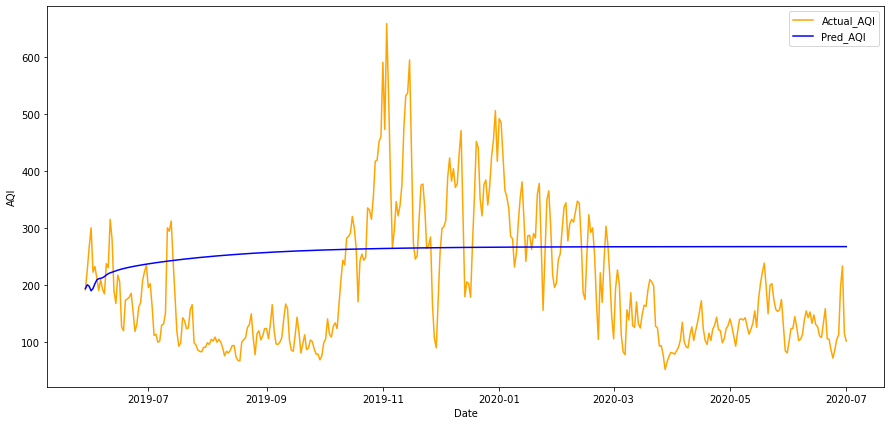

In [547]:
pred['Pred_AQI'] = pred[('AQI',)].astype(float)

f, ax= plt.subplots(figsize=(15,7))
sns.lineplot(x=test['Date'], y=test['AQI'], ax=ax, color='orange', label='Actual_AQI') 
sns.lineplot(x=test['Date'], y=pred[('Pred_AQI',)  ] , ax=ax, color='blue', label='Pred_AQI') 

# DEPLOYMENT

**Conclusion:**

The Air Quality Index not only affected by pollutant substances such as pollutant particles or NO2 and Co, but it also be affected by weather features, especially Temperature. 

The air quality in India, especially Delhi, is always been high, and it can endanger human health. The air quality seems to be improved lately with more days in a year has good air quality. However still, it is in alarming range and still can affect human respiratory system.

Regarding modelling:

Among regression models applied to the training dataset, random forest perform best as its accuracy score is the highest, and after applied hyper-parameter tuning, the score still in good number.

As compared to VAR model, which is used to predict every variables that related to AQI and also AQI, Prophet outperform VAR as the predicted value always range between upper and lower CI. Also, Prophet can handle outliers well, so when modelling with or without outlier and missing value treatment, the result still as good as expected.


**Answering research question: How next day’s air quality index (AQI) that can be predicted from pollutant substances and metrological factors?**

The next day’s AQI can be predicted in two way:

1.	Using VAR model to predict the pollutant substances and metrological substances measurement. Then we can used these forecasted value as an input for AQI prediction using Random Forest Regression model
2.	Using Prophet model to predict AQI from the pollutant substances and metrological substances measurement. This approach is easy to apply and the results given is in more acceptable range.
